# Adversarial Search: Playing Connect 4

Student Name: Prashant Iyer

I have used the following AI tools: Minimal reference to Bard

I understand that my submission needs to be my own work: PI

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Inital State: The initial state of the board in an empty grid. No player has started with their moves yet.

Actions: Actions define the valid columns at a given point on the board wherein the player can drop the disc.

Transition Model: Trasition Model or the result function defines the change in state after an valid move from the set of actions has been executed.

Goal State: The Goal state is the final state where in the winner is determined. The goal state here means if 4 discs are conencted horizontally, vertically or diagonally. If such a formation is not possible then, it is a draw. Here, if player1 wins, the utility value is 1, if the player -1 wins the utility value is -1 and draw state is represented using 0.

How big is the state space? Give an estimate and explain it.

The state space can be estimated as follows:

Assuming,

number of rows = 6

number of columns = 7.

no of options for each cell = 3 (empty, red, yellow)

Therefore, the state space = 3 ^ (6*7)

How big is the game tree that minimax search will go through? Give an estimate

1.   List item
2.   List item

and explain it.

We can estimate the size of the tree using the the following method:

Branching Factor: Assumiing the board size of 6x7, the branching factor would be 7

Depth: In a worst case scenario, all the cells would be filled when playing i.e. 6*7 = 42

Therefore, the size of the game = 7 ^ 42

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [6]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

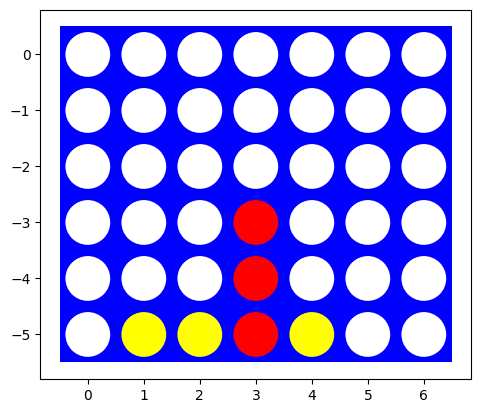

In [29]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [8]:
import numpy as np

def actions(board):
    return [col for col in range(board.shape[1]) if 0 in board[:, col]]

def result(board, player, action):
    new_board = board.copy()
    for r in range(board.shape[0] - 1, -1, -1):
        if np.any(new_board[r, action] == 0):
            new_board[r, action] = player
            break
    return new_board

def check_horizontal(board, player, row, col, n):
    for i in range(n):
        if not (0 <= col + i < board.shape[1] and board[row, col + i] == player):
            return False
    return True

def check_vertical(board, player, row, col, n):
    for i in range(n):
        if not (0 <= row + i < board.shape[0] and board[row + i, col] == player):
            return False
    return True

def check_diagonal(board, player, row, col, n):
  # Check downward-right diagonal
  for i in range(n):
    if not (0 <= row + i < board.shape[0] and 0 <= col + i < board.shape[1] and board[row + i, col + i] == player):
      return False

  # Check upward-right diagonal
  for i in range(n):
    if not (0 <= row - i < board.shape[0] and 0 <= col + i < board.shape[1] and board[row - i, col + i] == player):
      return False

  return True

def terminal(board, n):
    for player in [-1, 1]:
        for r in range(board.shape[0]):
            for c in range(board.shape[1]):
                if (
                    check_horizontal(board, player, r, c, n)
                    or check_vertical(board, player, r, c, n)
                    or check_diagonal(board, player, r, c, n)
                ):
                    return True
    return False

def utility(board, player, n):
    if not terminal(board, n):
        return None

    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if (
                check_horizontal(board, player, r, c, n)
                or check_vertical(board, player, r, c, n)
                or check_diagonal(board, player, r, c, n)
            ):
                utility_value = 1 if player == 1 else -1  # Changed -1 to 1 and 1 to 2
                #print(f"Utility for player {player} is {utility_value}")  # Print utility for debugging
                return utility_value
    return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [10]:
def random_player(board, player=1):

    available_actions = actions(board)
    if not available_actions:
        return None

    return np.random.choice(available_actions)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [11]:
def switch_player(player, p1, p2):
    if player == 1:
        return -1, p1
    else:
        return 1, p2

def empty_board(rows=6, cols=7):
    return np.zeros((rows, cols), dtype=int)

def game_play(p1, p2, N=1000, visualize_board=False):
    results = {1: 0, -1: 0, 'd': 0}

    for _ in range(N):
        board = empty_board()
        player, current_player_function = 1, p1

        while True:
            action = current_player_function(board, player)

            if action is None:
                break

            board = result(board, player, action)

            win = utility(board, player, 4)
            if win is not None:
                results[win] += 1
                break

            if not actions(board):
                results['d'] += 1
                break

            player, current_player_function = switch_player(player, p1, p2)  # Switch players for the next turn
    return results

# Define two random players
random_p1 = random_player
random_p2 = random_player

# Simulate 1000 games between the two random players without visualization
%time
results = game_play(random_p1, random_p2, N=1000, visualize_board=True)

# Print the results
print("Results after 1000 games:")
print("Player 1 wins (red): ", results[1])
print("Player 2 wins (yellow): ", results[-1])
print("Draws: ", results['d'])


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 17.2 µs
Results after 1000 games:
Player 1 wins (red):  538
Player 2 wins (yellow):  413
Draws:  49


We can see that Player 1 wins more number of times as compared to Player 2. Both the players are randomly placing the discs. In the game as making the first move has an added advantage, PLayer1 is having more number of wins.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [12]:
class Connect4MiniMaxPruningAgent:
    def __init__(self, player, actions, result, terminal, utility):
        self.player = player
        self.actions = actions
        self.result = result
        self.terminal = terminal
        self.utility = utility

    def minimax_alpha_beta(self, board, depth, n, alpha=float('-inf'), beta=float('inf'), maximizing_player=True):
        if depth == 0 or self.terminal(board, n):
            return None, self.utility(board, self.player, n) if self.utility(board, self.player, n) is not None else 0

        best_move = None

        if maximizing_player:
            max_evaluation = float('-inf')
            for action in self.actions(board):
                new_board = self.result(board, self.player, action)
                _, evaluation = self.minimax_alpha_beta(new_board, depth-1, n, alpha, beta, False)
                if evaluation > max_evaluation:
                    max_evaluation = evaluation
                    best_move = action
                alpha = max(alpha, evaluation)
                if beta <= alpha:
                    break
            return best_move, max_evaluation
        else:
            min_evaluation = float('inf')
            for action in self.actions(board):
                new_board = self.result(board, -self.player, action)
                _, evaluation = self.minimax_alpha_beta(new_board, depth-1, n, alpha, beta, True)
                if evaluation < min_evaluation:
                    min_evaluation = evaluation
                    best_move = action
                beta = min(beta, evaluation)
                if beta <= alpha:
                    break
            return best_move, min_evaluation


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.


Manually created board 1:


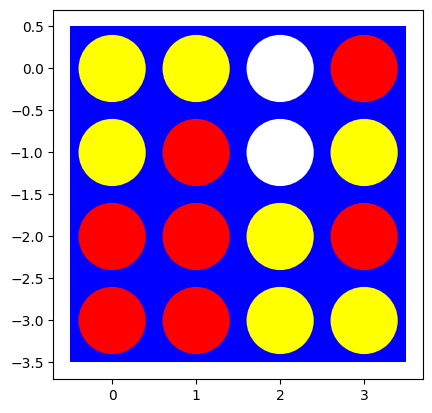

No valid move found for player 1


Manually created board 2:


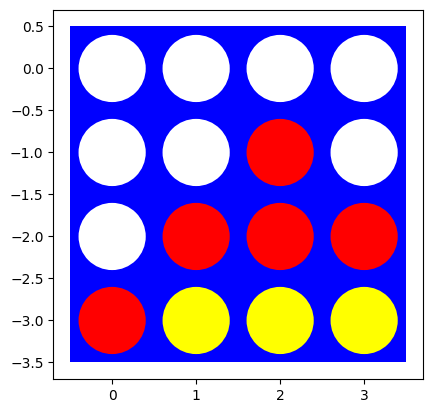

Best move for player 1 is column 0


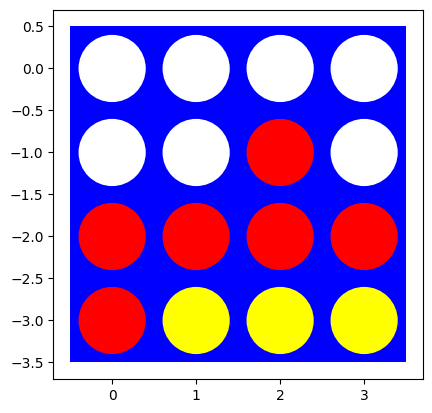



Manually created board 3:


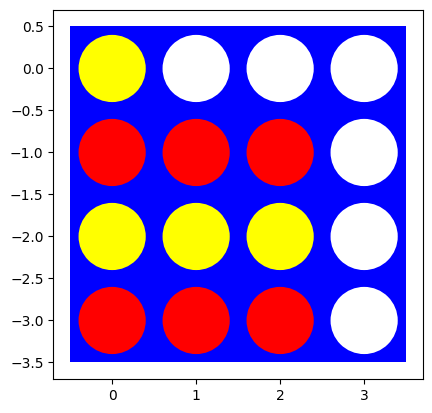

Best move for player 1 is column 3


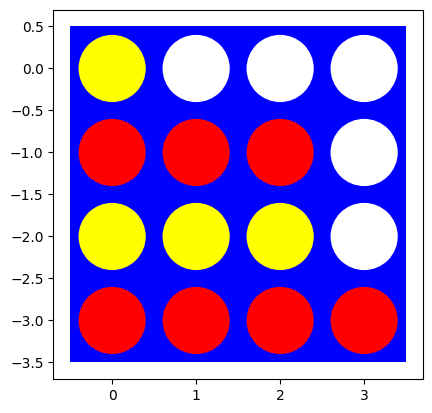



Manually created board 4:


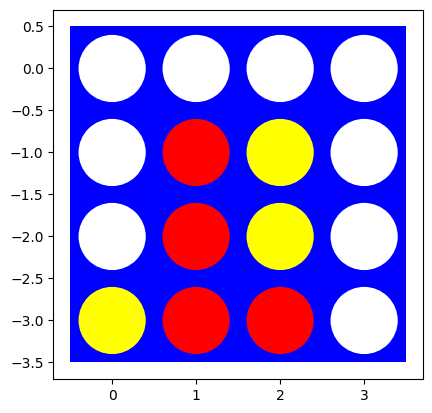

Best move for player 1 is column 1


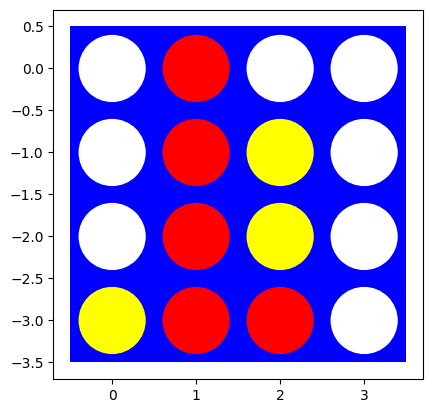



Manually created board 5:


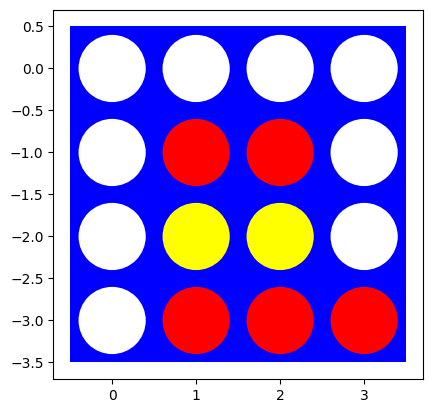

Best move for player 1 is column 0


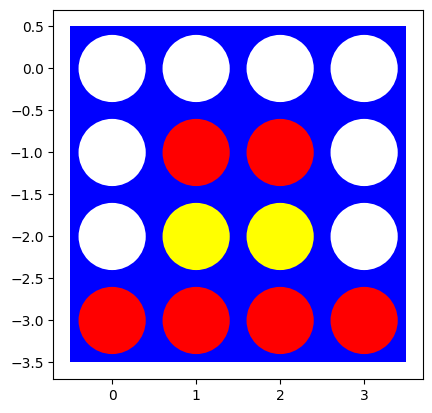

In [13]:
manual_boards = [
      np.array([
        [-1, -1, 0, 1],
        [-1, 1, 0, -1],
        [1, 1, -1, 1],
        [1, 1, -1, -1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 1, 1],
        [1, -1, -1, -1]
    ]),
    np.array([
        [-1, 0, 0, 0],
        [1, 1, 1, 0],
        [-1, -1, -1, 0],
        [1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, -1, 0],
        [0, 1, -1, 0],
        [-1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 1]
    ])
]

# Create an instance of the Connect4AgentMinimax class
game = Connect4MiniMaxPruningAgent(
    player=1, actions=actions, result=result,
    terminal=terminal, utility=utility
)

# Test the agent on the manually created boards
for i, board in enumerate(manual_boards):
    print(f"\nManually created board {i + 1}:")
    visualize(board)
    best_move, _ = game.minimax_alpha_beta(board, depth=7, n=4)
    if best_move is not None:
        print(f"Best move for player 1 is column {best_move}")
        # Visualize the final board after the agent's move
        final_board = game.result(board, player=1, action=best_move)
        visualize(final_board)
    else:
        print("No valid move found for player 1")
    print("")


How long does it take to make a move? Start with a smaller board with 4 columns

---

and make the board larger by adding columns.

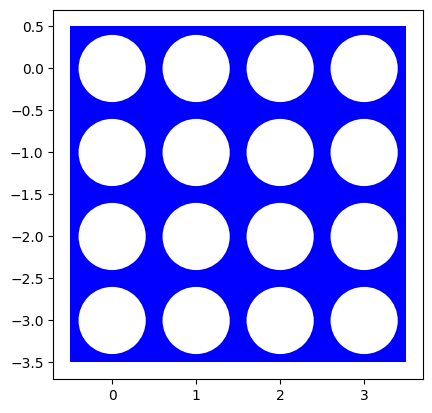

Best move for player 1 is column 0


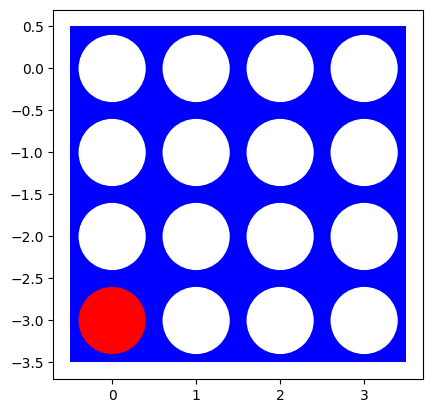

Time taken to make a move: 0.661851167678833 seconds
------------------------------------------


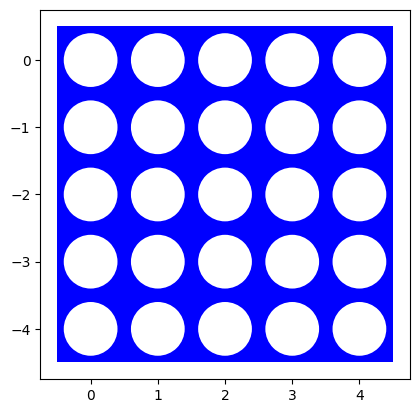

Best move for player 1 is column 0


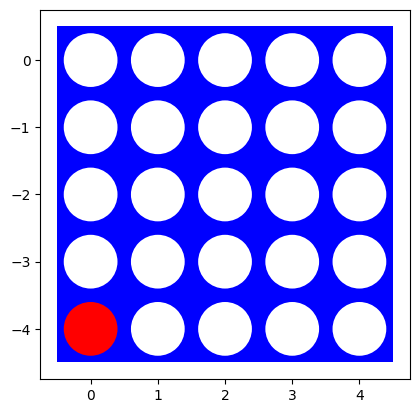

Time taken to make a move: 1.1479766368865967 seconds
------------------------------------------


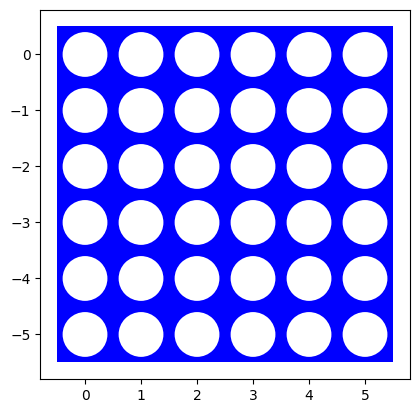

Best move for player 1 is column 0


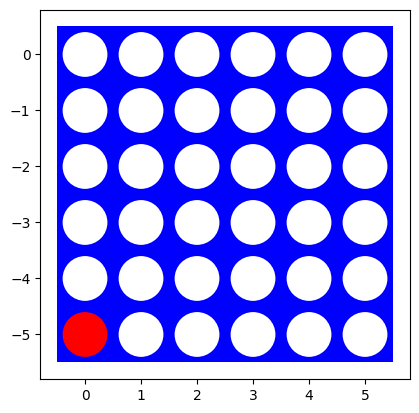

Time taken to make a move: 1.6747865676879883 seconds
------------------------------------------


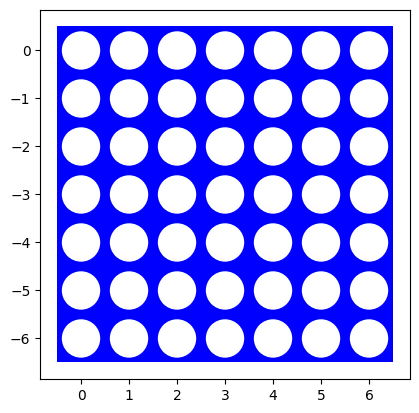

Best move for player 1 is column 0


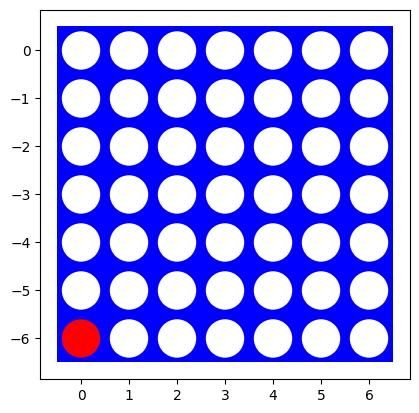

Time taken to make a move: 3.291806221008301 seconds
------------------------------------------


In [73]:
# Your code/ answer goes here.
import time

# Your code/ answer goes here.
agent = Connect4MiniMaxPruningAgent(
    player=1, actions=actions, result=result,
    terminal=terminal, utility=utility
)
board_sizes = [(4, 4), (5, 5), (6, 6), (7, 7)]

# Measure time for making a move on each board size
for size in board_sizes:
    rows, cols = size
    start_time = time.time()
    board = np.zeros((rows, cols))
    visualize(board)
    best_move, _ = agent.minimax_alpha_beta(board, depth=7, n=4)  # Adjust the depth as needed
    if best_move is not None:
        print(f"Best move for player 1 is column {best_move}")
        # Visualize the final board after the agent's move
        final_board = game.result(board, player=1, action=best_move)
        visualize(final_board)
    end_time = time.time()
    print(f"Time taken to make a move: {end_time - start_time} seconds")
    print("------------------------------------------")


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

We have added 4 ordering moves on the action before starting with the MinMaxPruning algorithm:

1. Winning Move: Identify if any next move is winning for the current player.
2. Blocking opposition move: Here, block any potential opponent winning move.
3. Center: Start from the center of the board if possible
4. Other Moves: Any other move would be then placed for execution

In [15]:
class Connect4MiniMaxPruningAgentMoveOrdering:
    def __init__(self, player, actions, result, terminal, utility):
        self.player = player
        self.opponent = -player
        self.actions = actions
        self.result = result
        self.terminal = terminal
        self.utility = utility

    def minimax_alpha_beta(self, board, depth, n, alpha=float('-inf'), beta=float('inf'), maximizing_player=True):
        if depth == 0 or self.terminal(board, n):
            return None, self.utility(board, self.player, n) if self.utility(board, self.player, n) is not None else 0

        ordered_actions = self.orderActions(board)
        best_move = None

        if maximizing_player:
            max_evaluation = float('-inf')
            for action in ordered_actions:
                new_board = self.result(board, self.player, action)
                _, evaluation = self.minimax_alpha_beta(new_board, depth-1, n, alpha, beta, False)
                if evaluation > max_evaluation:
                    max_evaluation = evaluation
                    best_move = action
                alpha = max(alpha, evaluation)
                if beta <= alpha:
                    break
            return best_move, max_evaluation
        else:
            min_evaluation = float('inf')
            for action in ordered_actions:
                new_board = self.result(board, -self.player, action)
                _, evaluation = self.minimax_alpha_beta(new_board, depth-1, n, alpha, beta, True)
                if evaluation < min_evaluation:
                    min_evaluation = evaluation
                    best_move = action
                beta = min(beta, evaluation)
                if beta <= alpha:
                    break
            return best_move, min_evaluation


    def orderActions(self, board):
        ordered_actions = []

        # Priority 1: Winning Moves
        for action in self.actions(board):
            new_board = self.result(board, self.player, action)
            if self.utility(new_board, self.player, 4) == 1:
                return [action]

        # Priority 2: Blocking Moves
        for action in self.actions(board):
            new_board = self.result(board, self.opponent, action)
            if self.utility(new_board, self.opponent, 4) == 1:
                return [action]

        # Priority Center if available
        center = board.shape[1] // 2
        if center in self.actions(board):
            ordered_actions.append(action)

        # All other moves
        for action in self.actions(board):
            if action != center:
                ordered_actions.append(action)
        return ordered_actions



Manually created board 1:


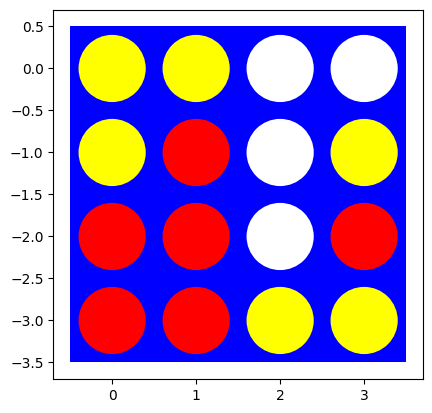

Best move for player 1 is column 2


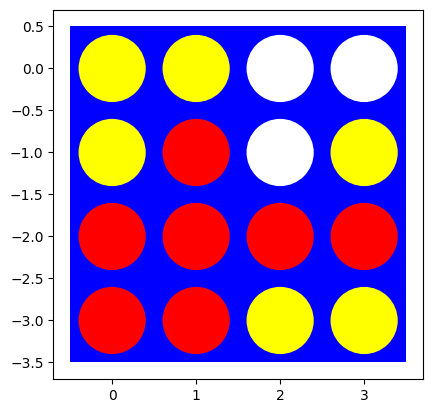



Manually created board 2:


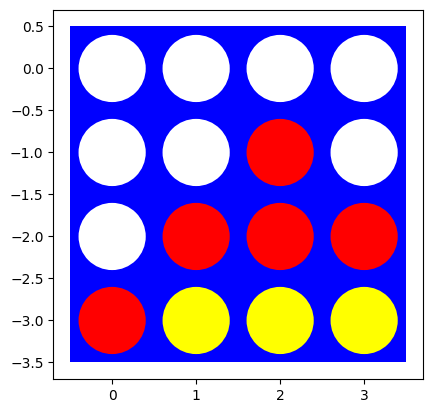

Best move for player 1 is column 0


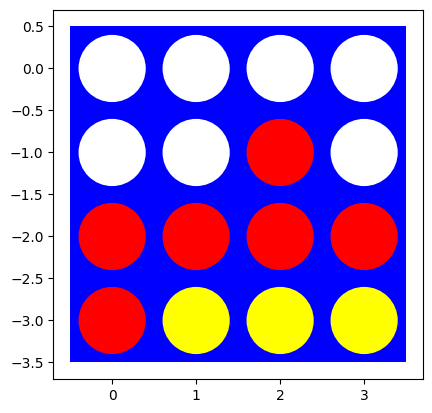



Manually created board 3:


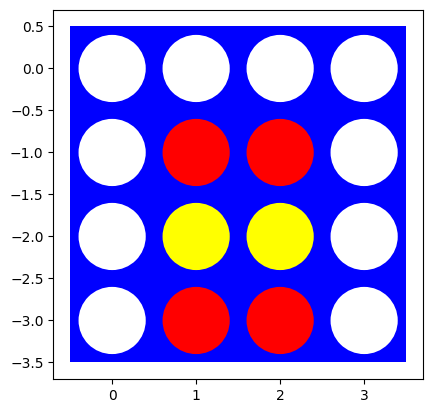

Best move for player 1 is column 3


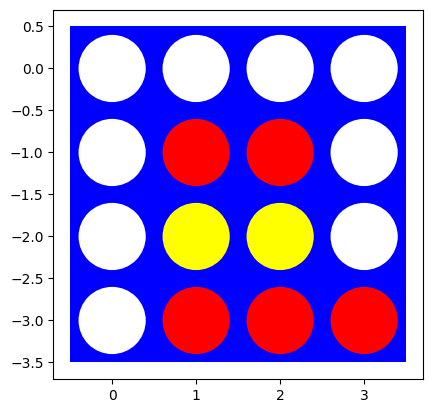



Manually created board 4:


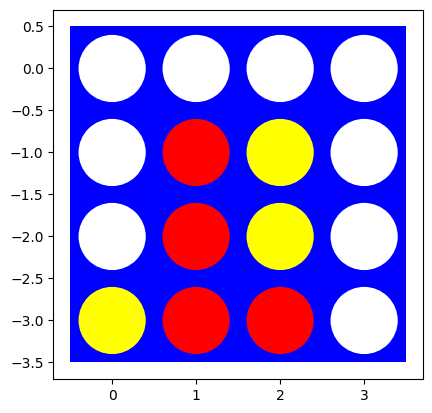

Best move for player 1 is column 1


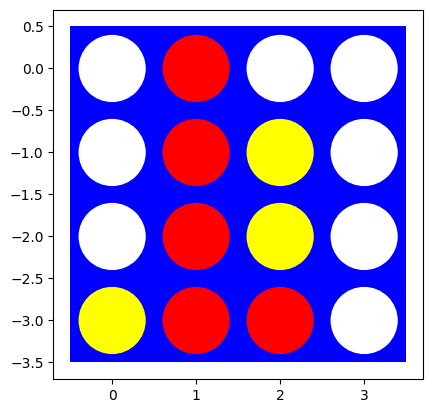



Manually created board 5:


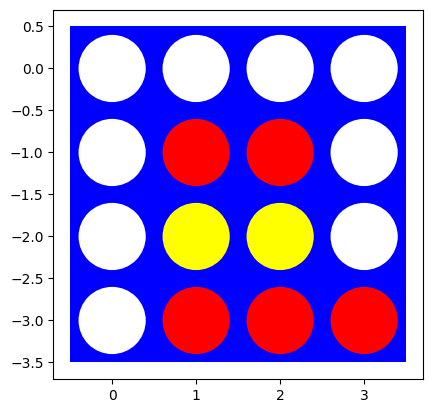

Best move for player 1 is column 0


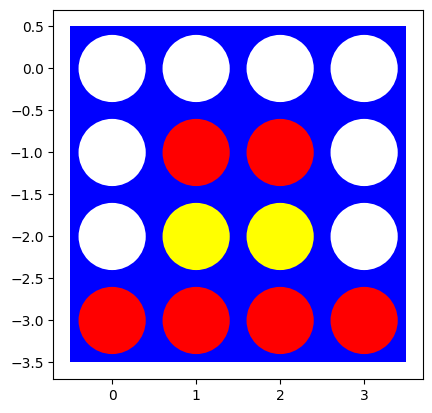



Manually created board 6:


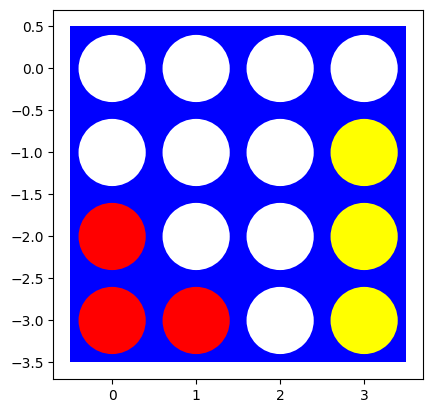

Best move for player 1 is column 3


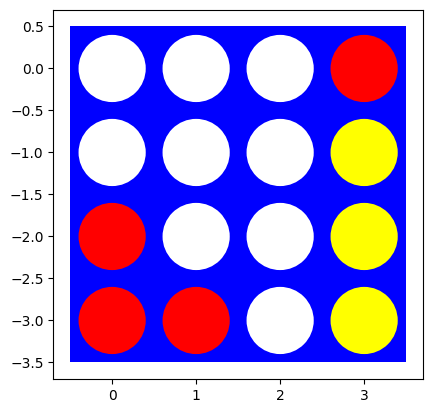

In [16]:
manual_boards = [
      np.array([
        [-1, -1, 0, 0],
        [-1, 1, 0, -1],
        [1, 1, 0, 1],
        [1, 1, -1, -1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 1, 1],
        [1, -1, -1, -1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, -1, 0],
        [0, 1, -1, 0],
        [-1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 1]
    ]),
        np.array([
        [0, 0, 0, 0],
        [0, 0, 0, -1],
        [1, 0, 0, -1],
        [1, 1, 0, -1]
    ])
]

# Create an instance of the Connect4AgentMinimax class
agent = Connect4MiniMaxPruningAgentMoveOrdering(player = 1, actions= actions, result = result, terminal=terminal, utility=utility)

# Test the agent on the manually created boards
for i, board in enumerate(manual_boards):
    print(f"\nManually created board {i + 1}:")
    visualize(board)
    best_move, _ = agent.minimax_alpha_beta(board, depth=7, n=4)
    if best_move is not None:
        print(f"Best move for player 1 is column {best_move}")
        # Visualize the final board after the agent's move
        final_board = game.result(board, player=1, action=best_move)
        visualize(final_board)
    else:
        print("No valid move found for player 1")
    print("")

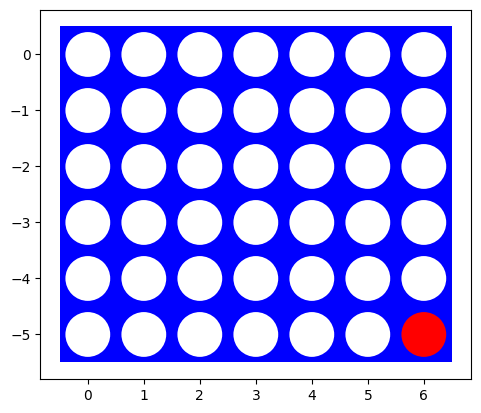

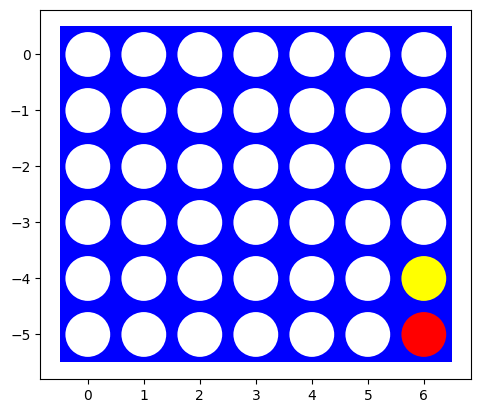

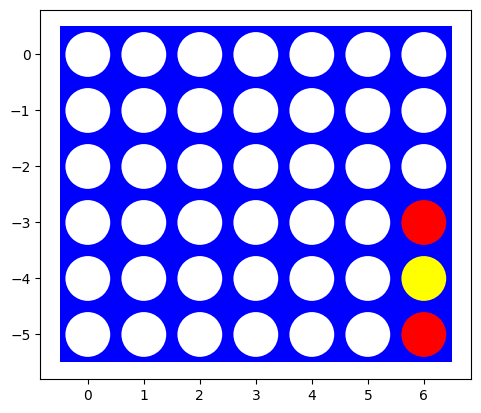

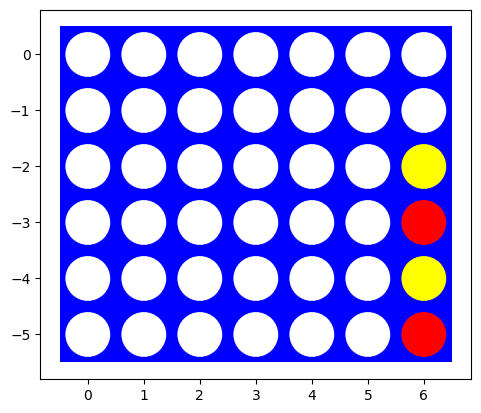

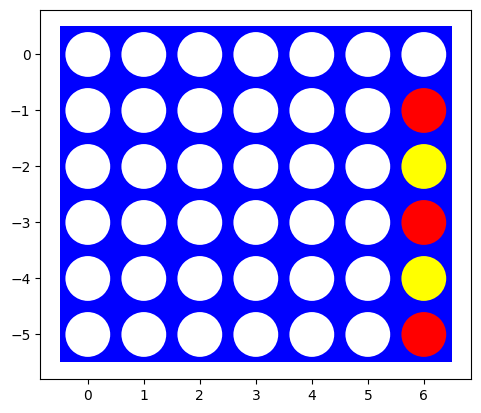

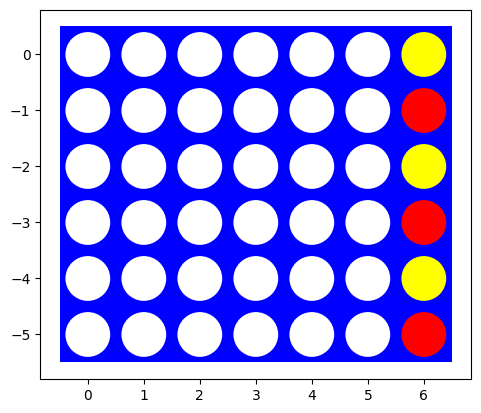

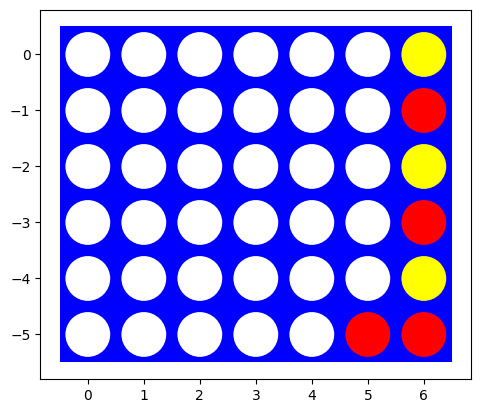

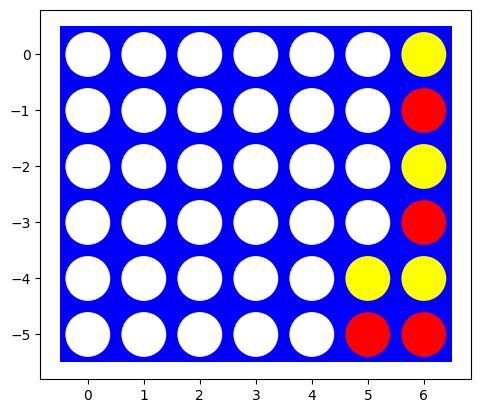

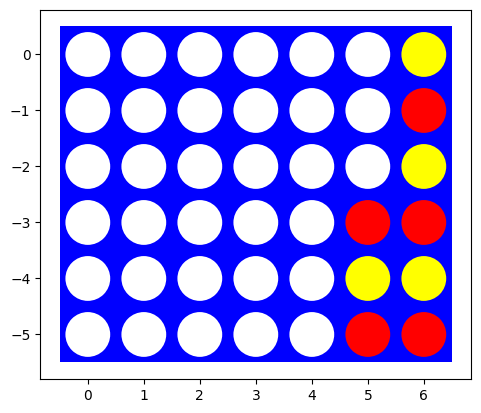

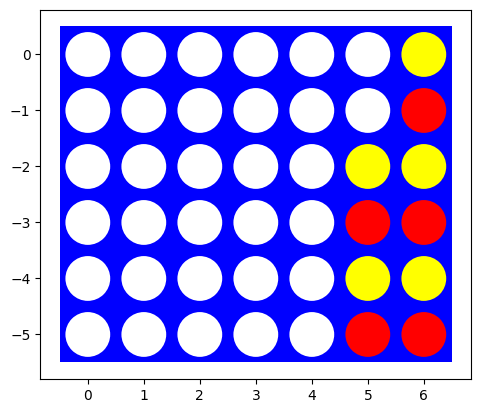

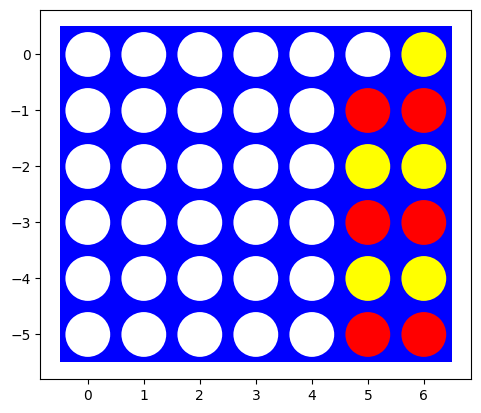

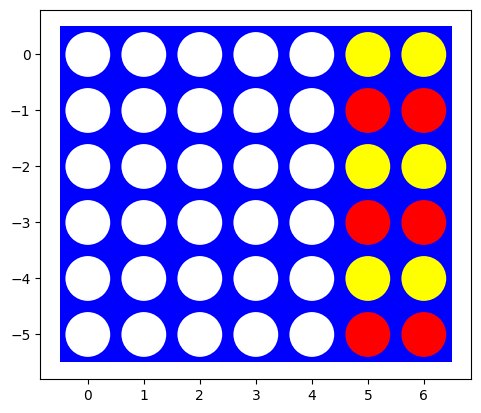

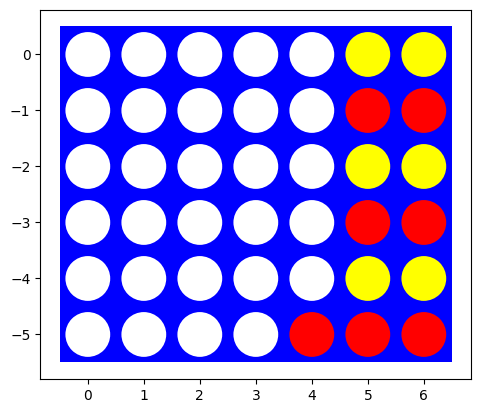

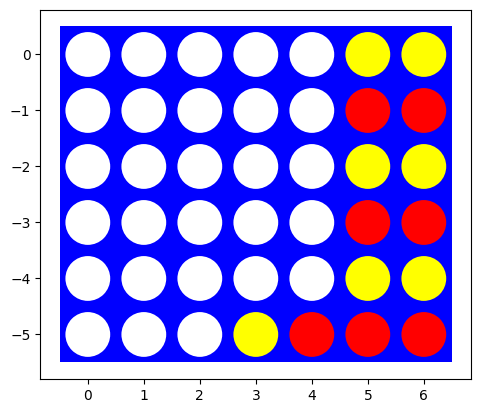

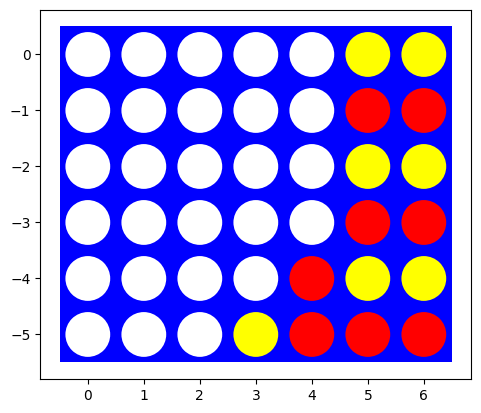

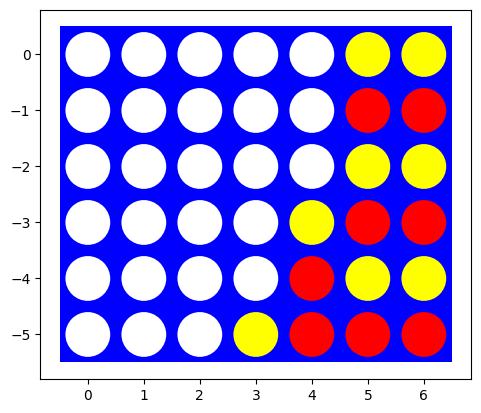

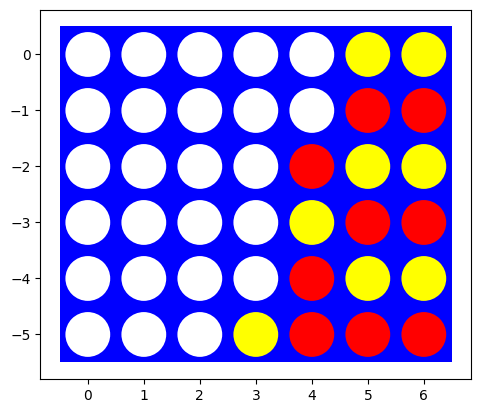

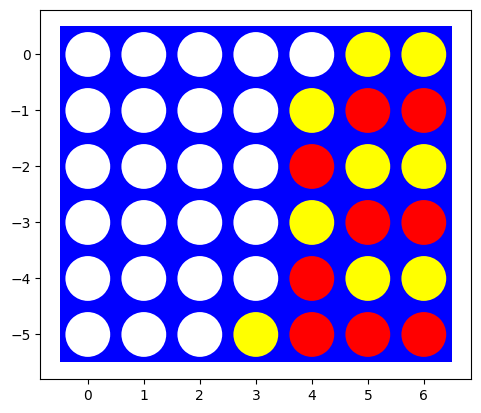

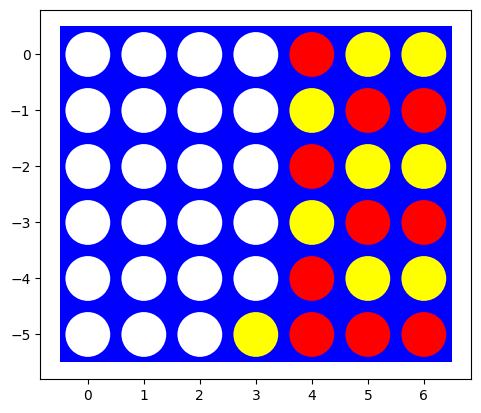

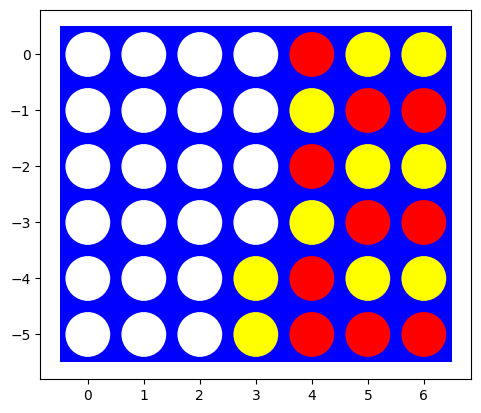

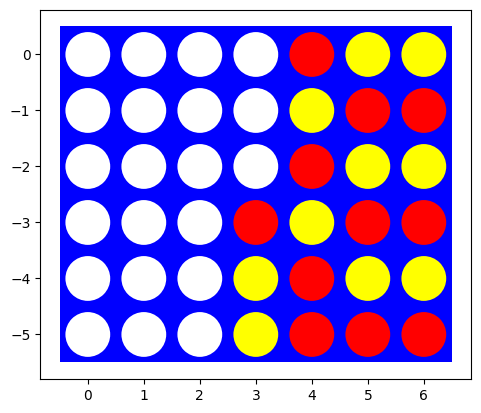

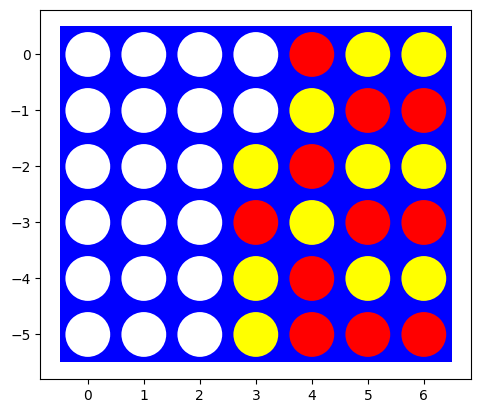

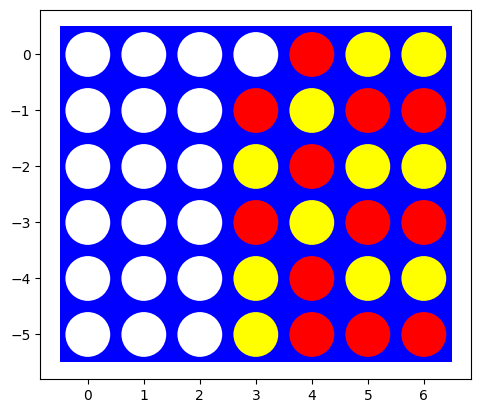

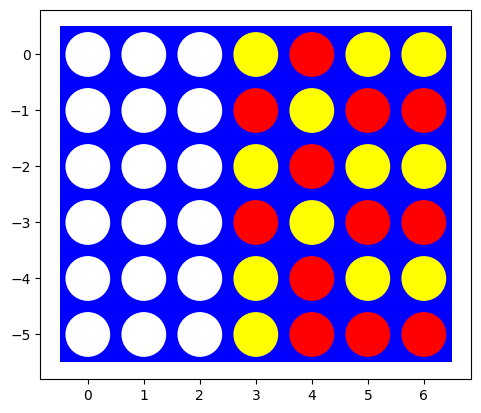

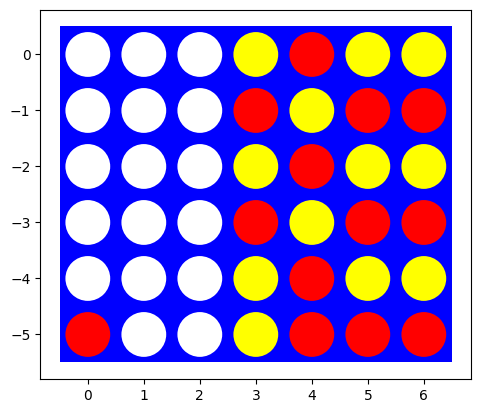

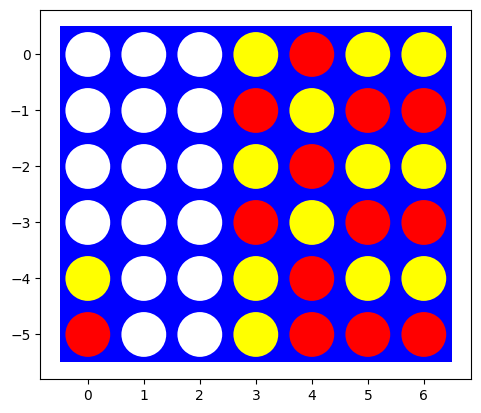

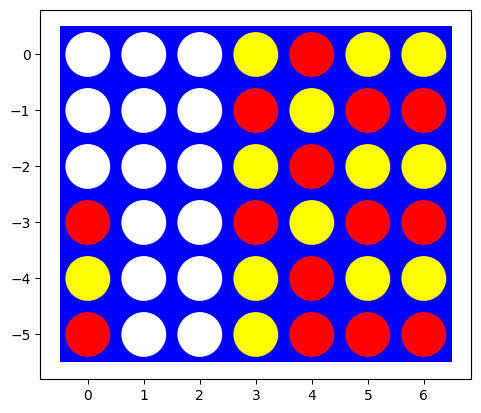

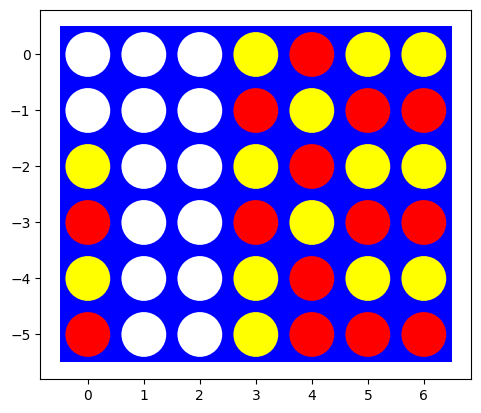

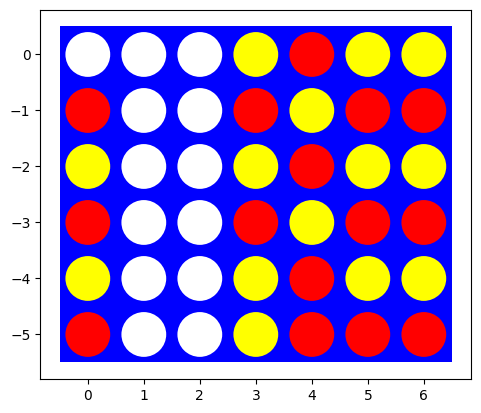

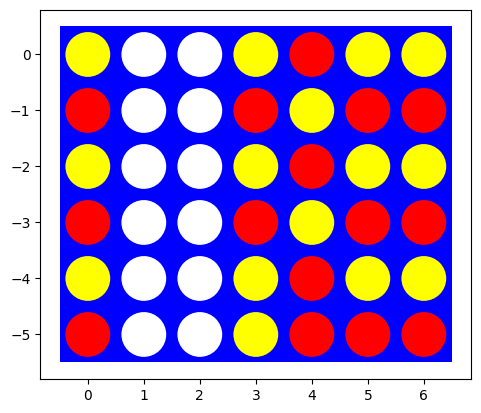

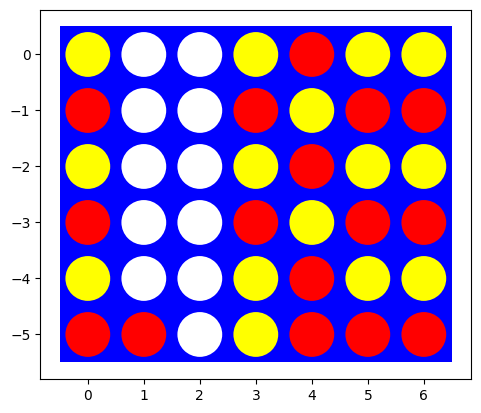

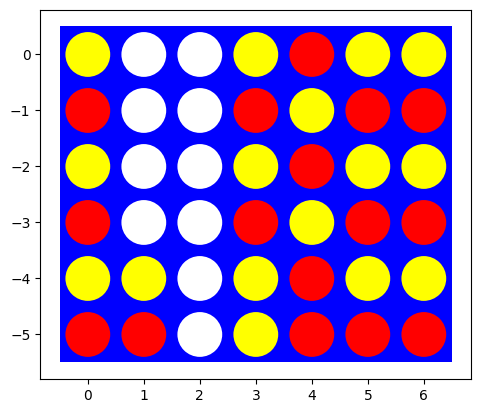

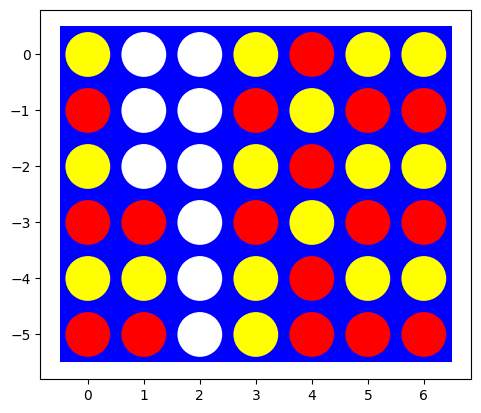

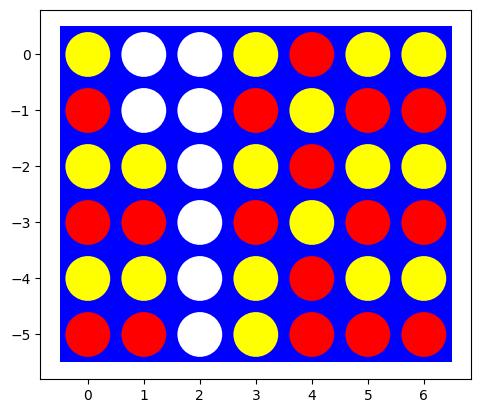

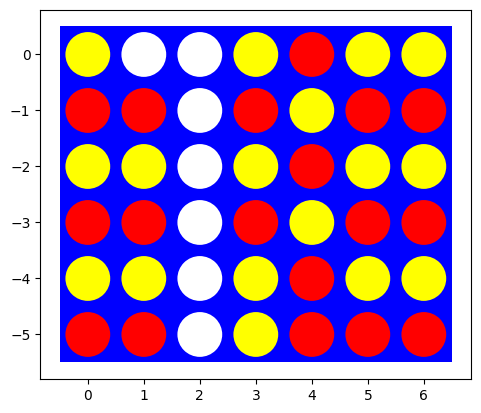

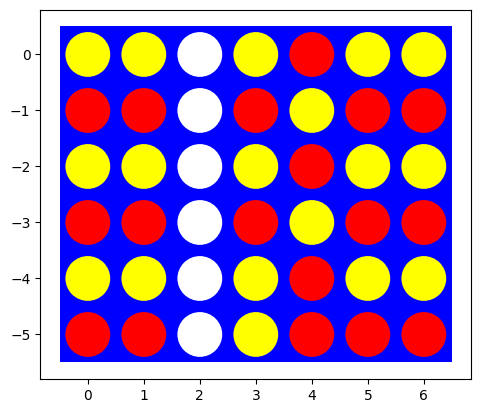

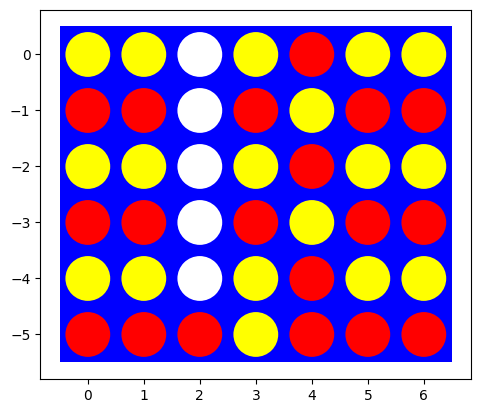

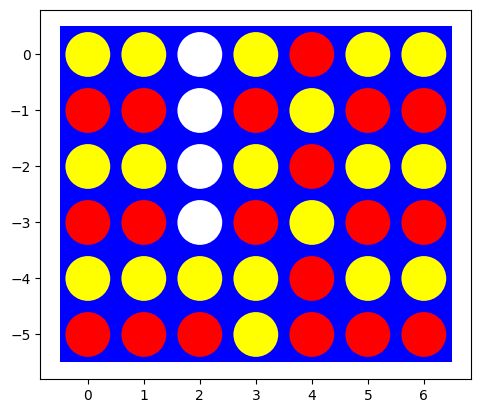

Player 2 wins!


In [17]:
#Game between two Move Ordering Players

player1 = Connect4MiniMaxPruningAgentMoveOrdering(player = 1, actions= actions, result = result, terminal=terminal, utility=utility)
player2 = Connect4MiniMaxPruningAgentMoveOrdering(player = -1, actions= actions, result = result, terminal=terminal, utility=utility)


# Initialize an empty board
board = np.zeros((6, 7), dtype=int)

# Main game loop
current_player = 1  # Start with player 1
while not terminal(board, 4):  # Continue until the game reaches a terminal state
    # Determine the current player's agent
    current_agent = player1 if current_player == 1 else player2

    # Get the best move for the current player using the minimax algorithm
    move, _ = current_agent.minimax_alpha_beta(board, depth=6, n=4)  # Adjust the depth as needed

    # Apply the move to the board
    board = result(board, current_player, move)
    visualize(board)
    current_player = -1 if current_player == 1 else 1

# Game is over
winner = utility(board, 1, 4) if utility(board, 1, 4) != 0 else utility(board, -1, 4)
# print(board)
# print(winner)
if winner == 1:
    print("Player 1 wins!")
elif winner == -1:
    print("Player 2 wins!")
else:
    print("It's a draw!")

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In a worst case setting, the minimax tree would evaluate all the possible options present when deciding the best move. Howeverm this could take forever and for larger board it might even be difficult to fit in the memory. In these cases, the following techniques might be helpful:

Alpha-beta pruning: Based on the alpha and beta parameters, it would estimate what the tree size should explored be derive the maximum utility. When these limits are crossed, the tree is pruned avoiding any further searches.

Move Ordering: This helps get the right direction in which the players agents can proceed when exploring the options. This on top of alpha-beta pruning can derive the best move quicker.

Heuristic Evaluation: Have the heuristic function setup can help evaluate the options quicker in an optimal way as it would assist in choosing the right move instead of random exploration.

Iterative search: This ia a shallow search depth and gradually increases it until a time limit is reached


### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

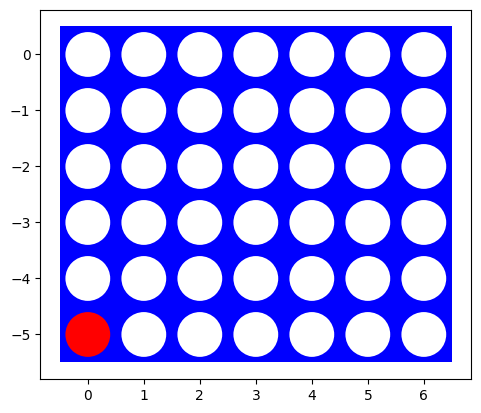

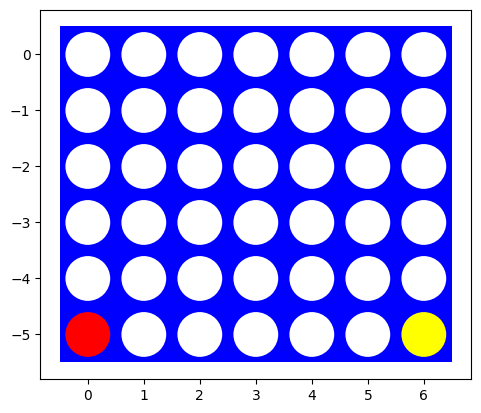

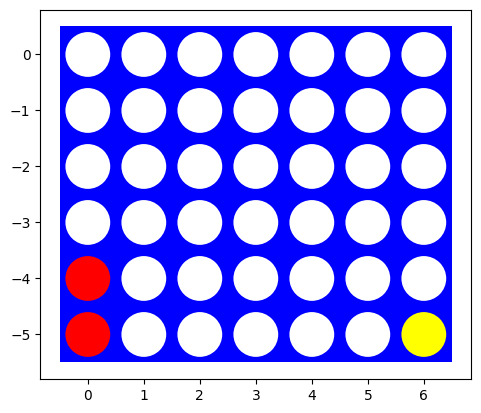

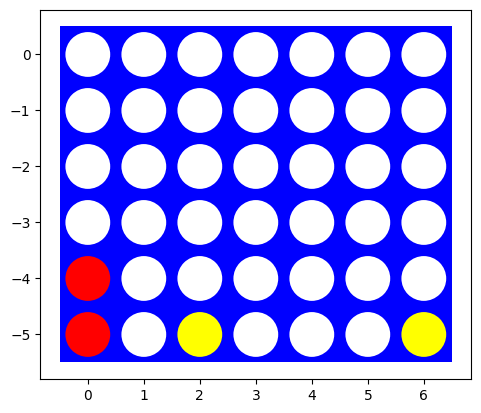

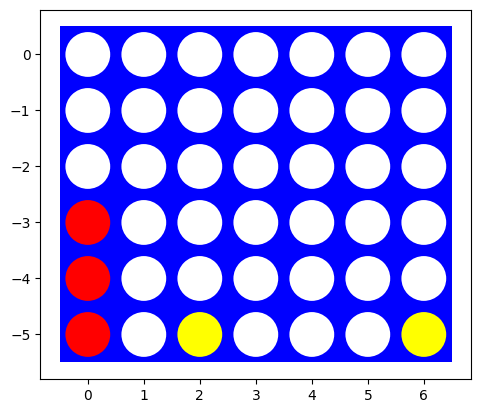

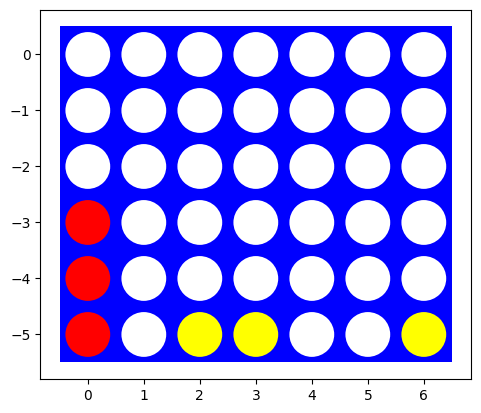

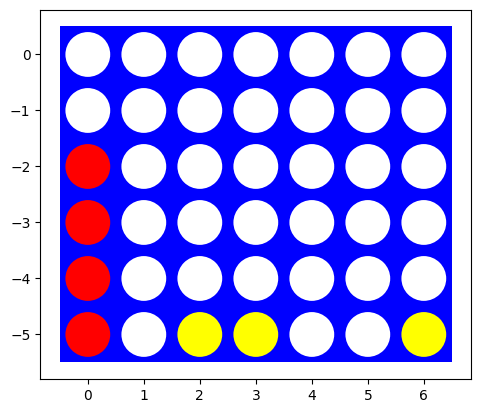

Player 1 wins!


In [77]:
# Your code/ answer goes here.

#MiniMax vs Random Player

import numpy as np

player1 = Connect4MiniMaxPruningAgent(
    player=1, actions=actions, result=result,
    terminal=terminal, utility=utility
)

board = np.zeros((6, 7), dtype=int)

# Main game loop
current_player = 1  # Start with player 1
while not terminal(board, 4):  # Continue until the game reaches a terminal state
    if current_player == 1:
        move, _ = player1.minimax_alpha_beta(board, depth=6, n=4)  # Adjust the depth as needed
    else:
        # Player 2 (random player) makes a move
        move = random_player(board, player=-1)

    # Apply the move to the board
    board = result(board, current_player, move)
    # Visualize the current state of the board
    visualize(board)

    # Switch to the next player
    current_player = -1 if current_player == 1 else 1

# Determine the winner based on the utility of the final board
winner = utility(board, 1, 4) if utility(board, 1, 4) != 0 else utility(board, -1, 4)
if winner == 1:
    print("Player 1 wins!")
elif winner == -1:
    print("Player 2 wins!")
else:
    print("It's a draw!")


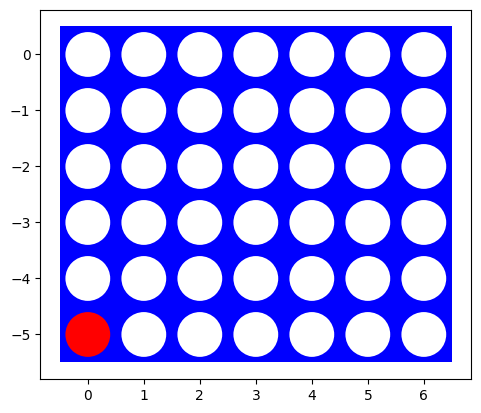

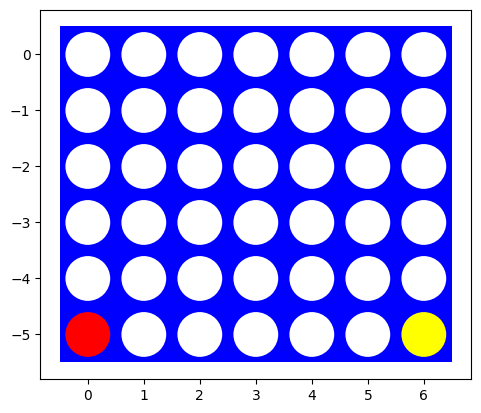

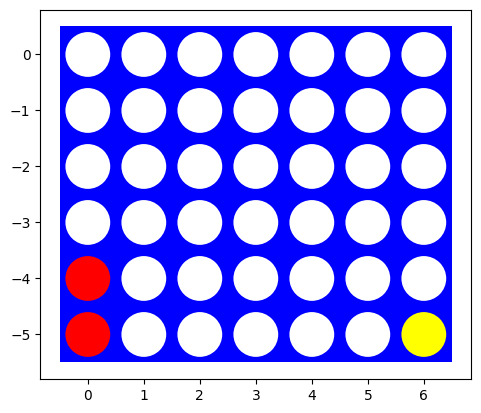

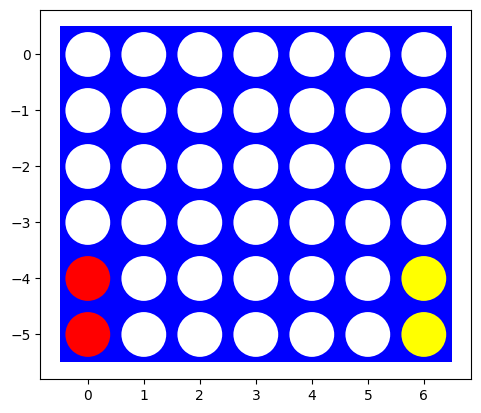

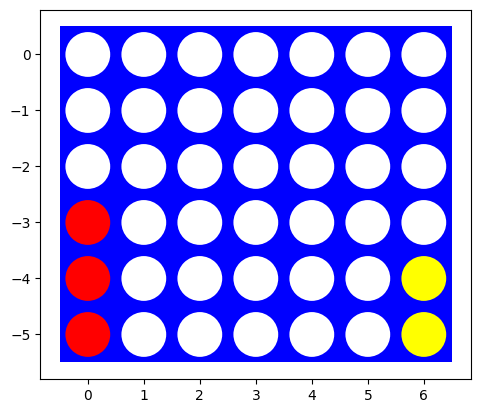

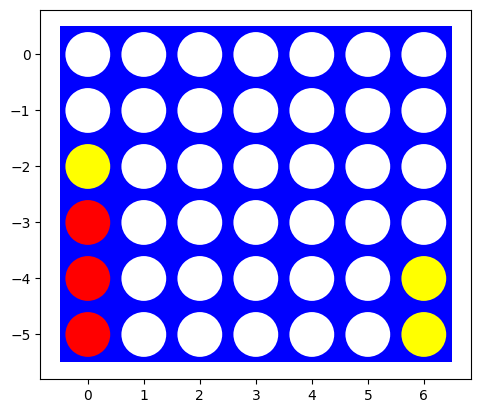

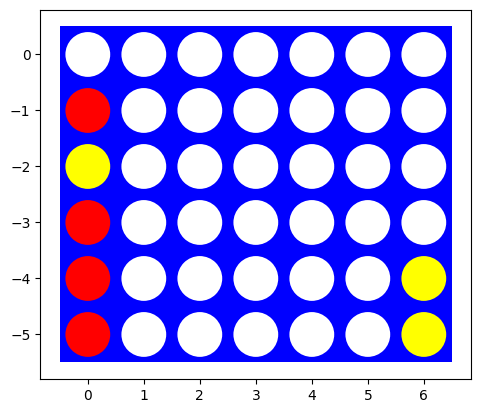

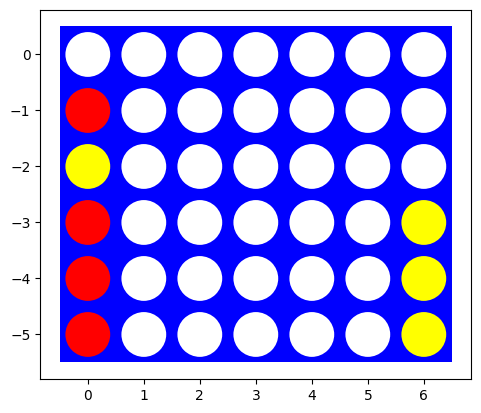

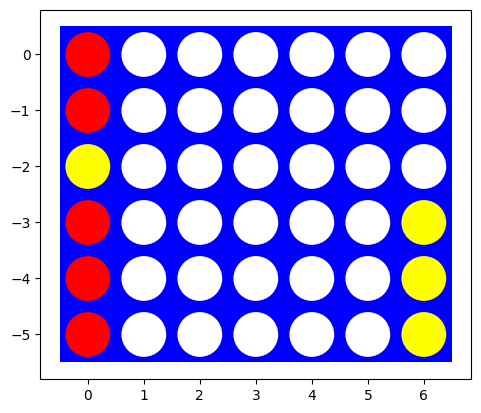

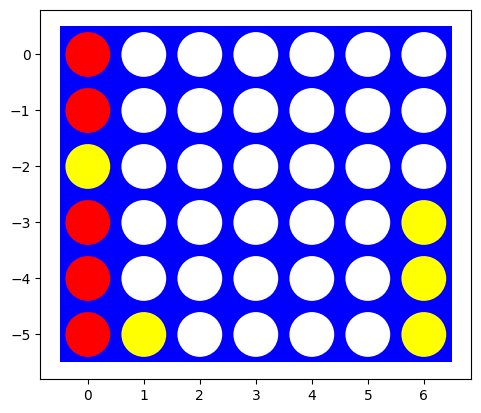

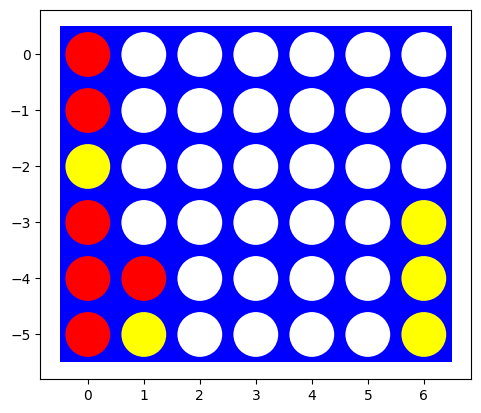

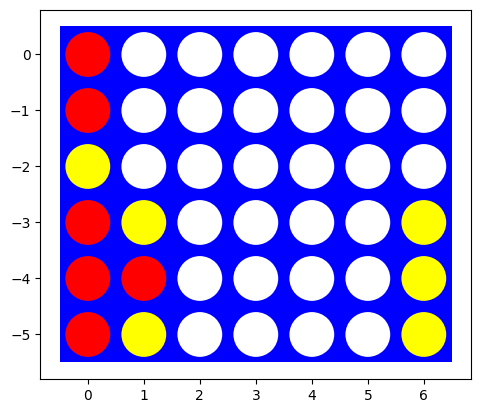

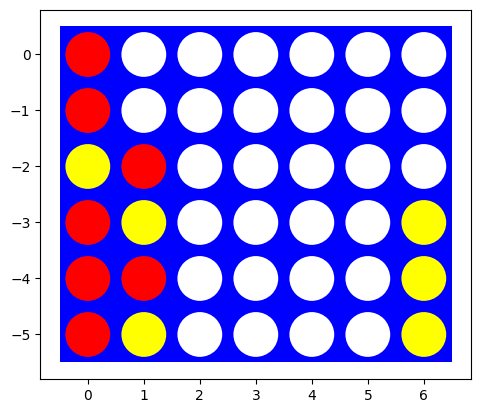

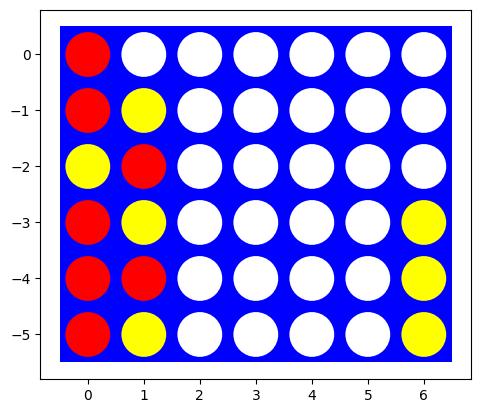

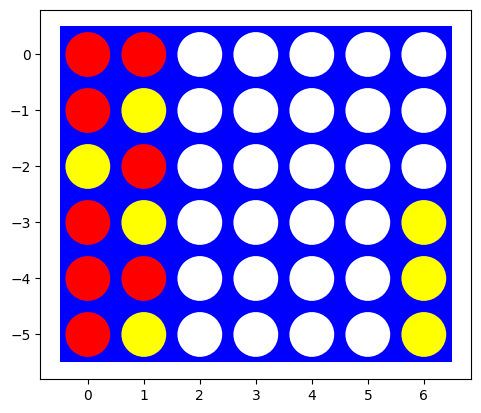

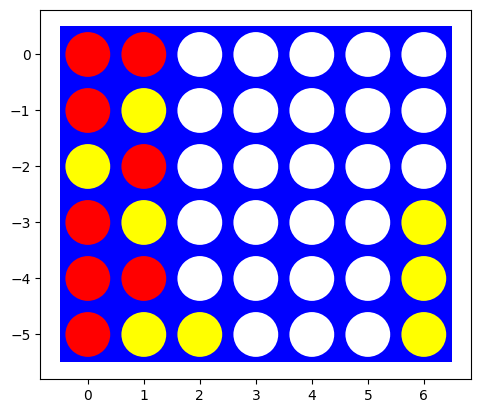

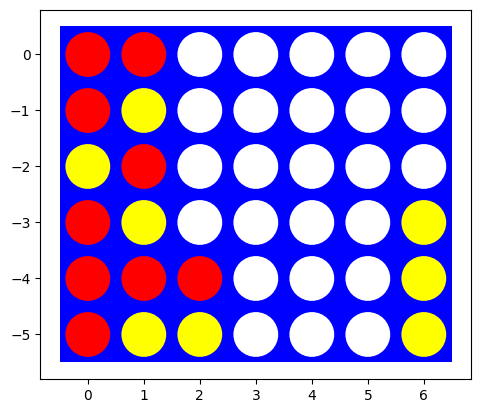

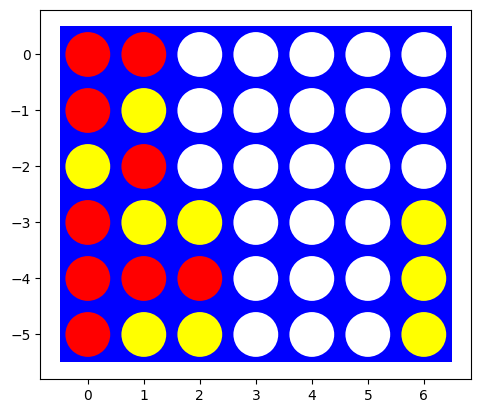

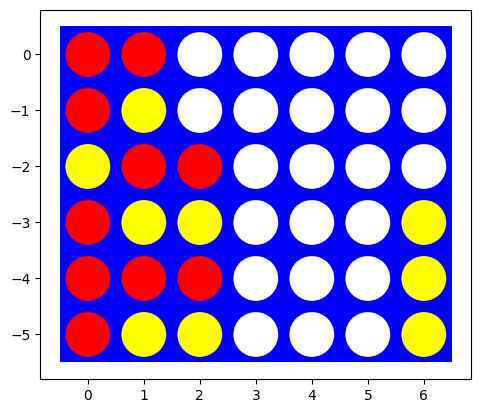

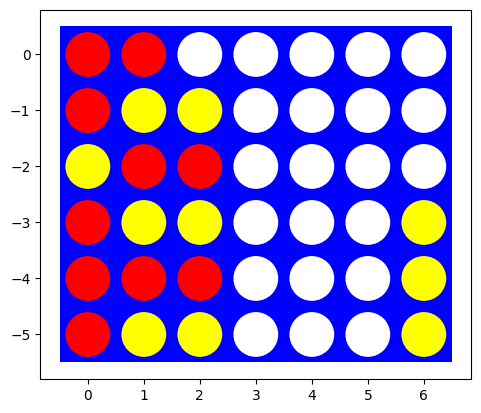

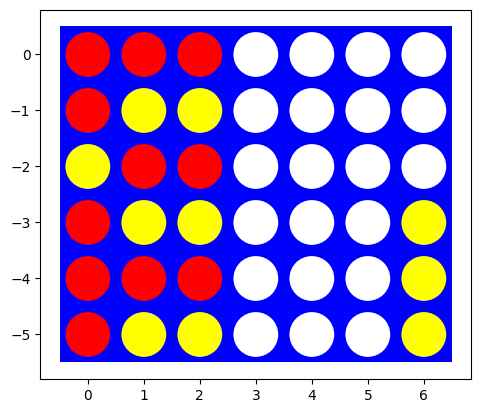

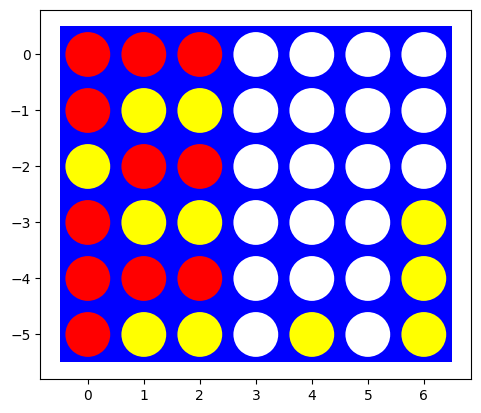

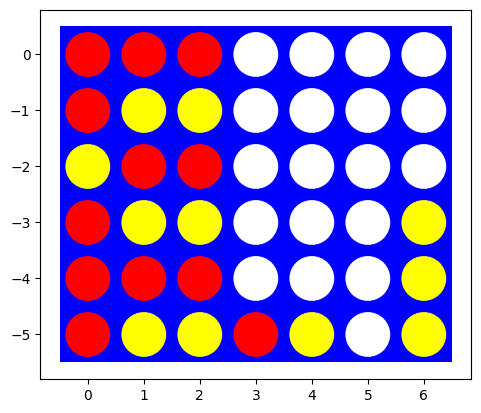

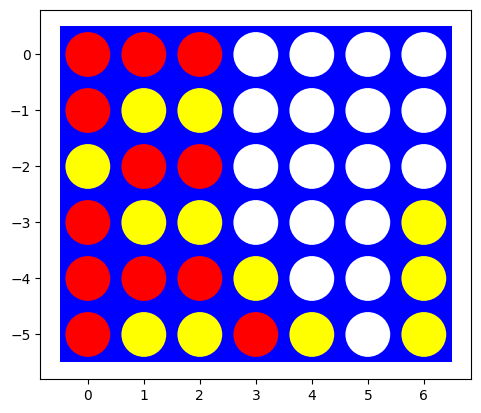

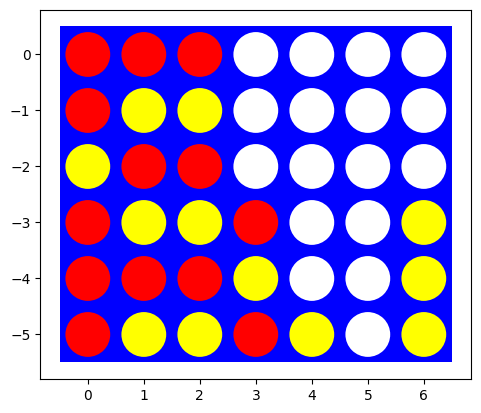

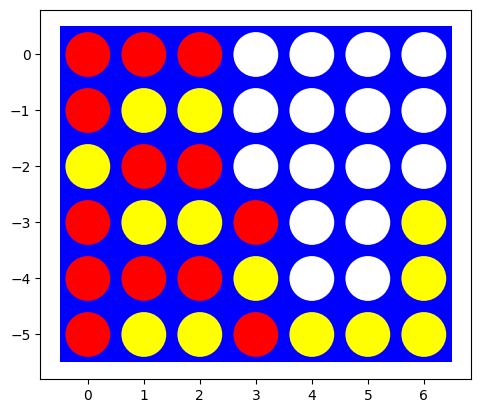

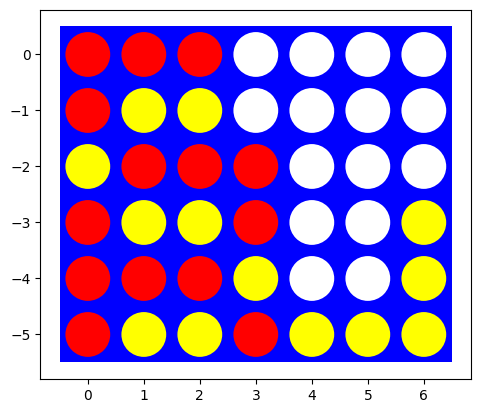

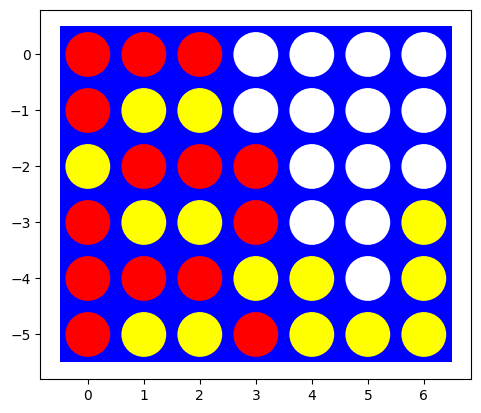

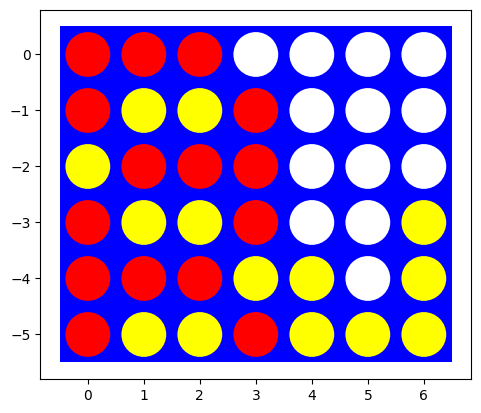

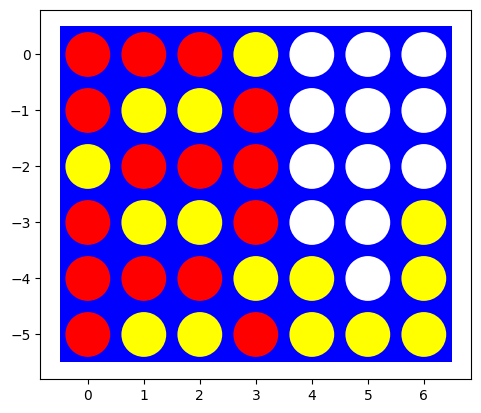

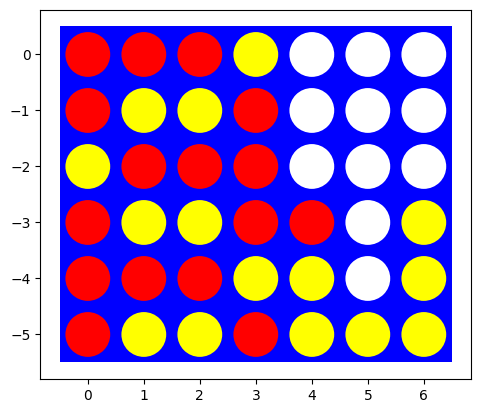

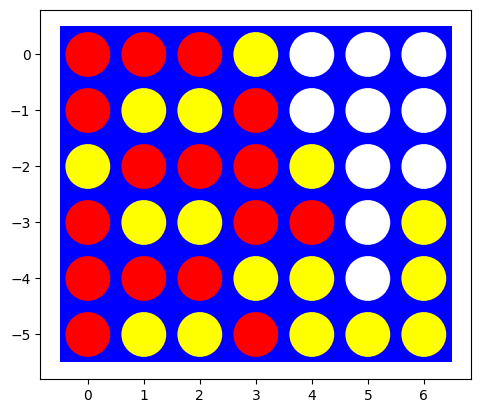

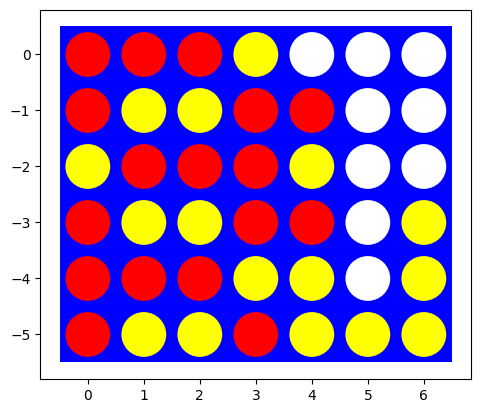

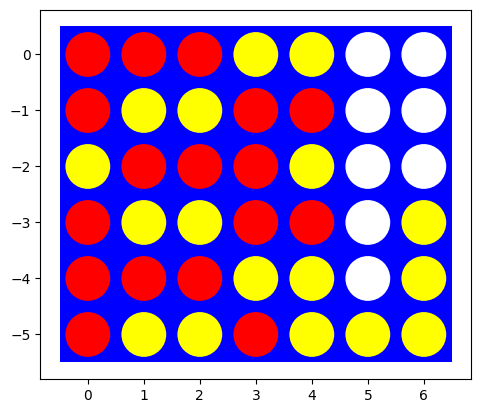

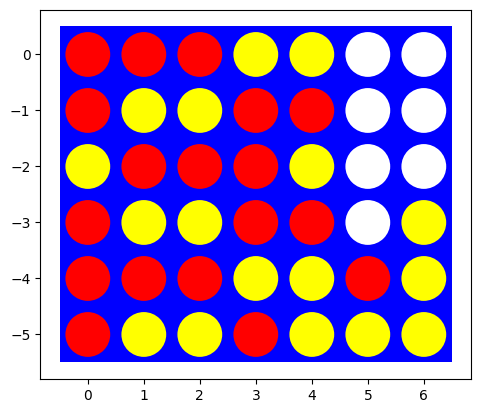

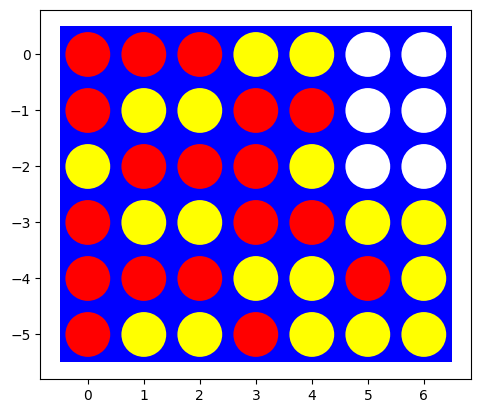

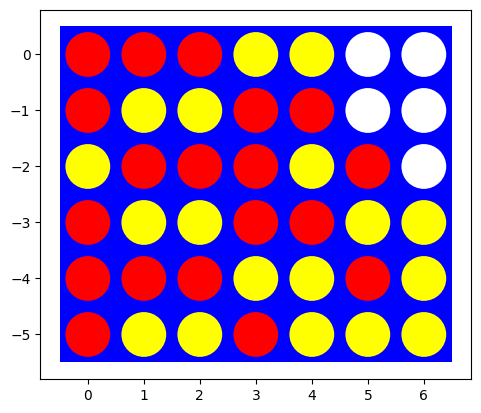

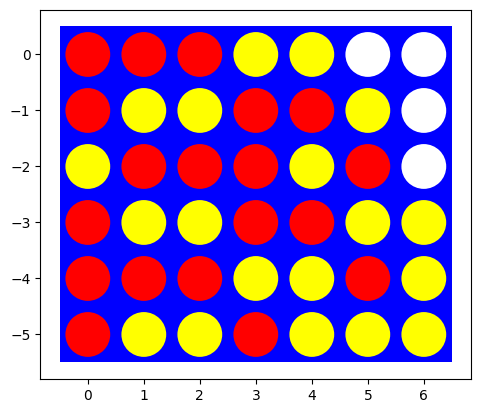

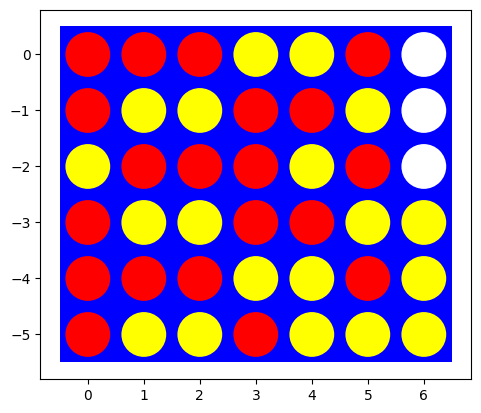

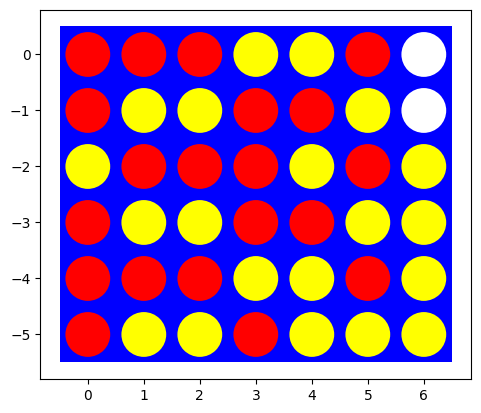

Player 2 wins!


In [18]:
# Your code/ answer goes here.

#MiniMaxPruning vs MiniMaxPruningMoveOrdering Player

import numpy as np

player1 = Connect4MiniMaxPruningAgent(
    player=1, actions=actions, result=result,
    terminal=terminal, utility=utility
)

player2 = Connect4MiniMaxPruningAgentMoveOrdering(player = -1, actions= actions, result = result, terminal=terminal, utility=utility)


board = np.zeros((6, 7), dtype=int)

# Main game loop
current_player = 1
while not terminal(board, 4):  # Continue until the game reaches a terminal state
    if current_player == 1:
        move, _ = player1.minimax_alpha_beta(board, depth=7, n=4)  # Adjust the depth as needed
    else:
        move, _ = player2.minimax_alpha_beta(board, depth=7, n=4)

    board = result(board, current_player, move)
    visualize(board)

    current_player = -1 if current_player == 1 else 1

# Determine the winner based on the utility of the final board
winner = utility(board, 1, 4) if utility(board, 1, 4) != 0 else utility(board, -1, 4)
if winner == 1:
    print("Player 1 wins!")
elif winner == -1:
    print("Player 2 wins!")
else:
    print("It's a draw!")


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

Heruistic Function based on three factors:

1. Assigning higher scores to moves that take you closer to reaching n number of discs
2. Assigning scores for higher scores for identifying winning moves.
3. Identifying opposition opponent threat by scoring negative when any move that might help the opponent win is being executed

In [19]:
# Your code/ answer goes here.
def heuristic(board, player, n):
  score = 0

#Scores based on assigning discs on board
  for row in range(board.shape[0]):
    for col in range(board.shape[1]):
      if board[row, col] == player:
        connection = 1
        while col + connection < board.shape[1] and board[row, col+connection] == player and connection <= n:
          connection +=1
        score += connection ** 2
        connection = 1
        while row + connection < board.shape[0] and board[row + connection, col] == player and connection <= n:
          connection +=1
        score += connection ** 2
        connection = 1
        while row + connection < board.shape[0] and col + connection < board.shape[1] and board[row + connection, col + connection] == player and connection <= n:
          connection += 1
        score += connection ** 2
        connection = 1
        while row - connection >= 0 and col - connection >= 0 and board[row - connection, col - connection] == player and connection <= n:
          connection += 1
        score += connection ** 2

  for row in range(board.shape[0]):
    for col in range(board.shape[1]):
      if board[row, col] == 0:
          # Check potential for horizontal winning sequence next move
        if check_horizontal(board, player, row, col + 1, n - 1):
            score += 5

          # Check potential for vertical winning sequence next move
        if check_vertical(board, player, row + 1, col, n - 1):
            score += 5

        if check_diagonal(board, player, row, col, n-1):
          score += 5

  opponent = -1 if player == 1 else 1
  for row in range(board.shape[0]):
    for col in range(board.shape[1]):
      if board[row, col] == 0:
        if check_horizontal(board, opponent, row, col + 1, n - 1):
          score -= 2  # Penalty for opponent's threat

        # Check if opponent can win next move here (vertical)
        if check_vertical(board, opponent, row + 1, col, n - 1):
          score -= 2  # Penalty for opponent's threat

        if check_diagonal(board, opponent, row, col, n - 1):
          score -= 2

  return score

In [20]:
import numpy as np

# Sample Connect Four board (replace with your actual board representation)
board = np.array([
    [0, 0, 1, -1, 0],
    [0, -1, 1, 0, 0],
    [1, -1, 1, 0, 0],
    [-1, 1, -1, 1, 0],
    [-1, 1, -1, -1, 1],
    [1, -1, 1, 1, -1],
])

player = 1

n = 4

score = heuristic(board, player, n)

print(f"Board score for player {player}: {score}")


Board score for player 1: 95


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

Embedded the above Heristic function into the class along with Cut Off Search

In [23]:
class Connect4MiniMaxPruningAgentHeuristicCutoff:
    def __init__(self, player, actions, result, terminal, utility, check_diagonal, check_horizontal, check_vertical):
        self.player = player
        self.actions = actions
        self.result = result
        self.terminal = terminal
        self.utility = utility
        self.check_diagonal = check_diagonal
        self.check_vertical = check_vertical
        self.check_horizontal = check_horizontal

    @staticmethod
    def heuristic(board, player, n):
        score = 0

        # Scores based on assigning discs on board
        for row in range(board.shape[0]):
            for col in range(board.shape[1]):
                if board[row, col] == player:
                    connection = 1
                    while col + connection < board.shape[1] and board[row, col+connection] == player and connection < n:
                        connection += 1
                    score += connection ** 2
                    connection = 1
                    while row + connection < board.shape[0] and board[row + connection, col] == player and connection < n:
                        connection += 1
                    score += connection ** 2
                    connection = 1
                    while row + connection < board.shape[0] and col + connection < board.shape[1] and board[row + connection, col + connection] == player and connection < n:
                        connection += 1
                    score += connection ** 2
                    connection = 1
                    while row - connection >= 0 and col - connection >= 0 and board[row - connection, col - connection] == player and connection <n:
                        connection += 1
                    score += connection ** 2

        for row in range(board.shape[0]):
            for col in range(board.shape[1]):
                if board[row, col] == 0:
                    if check_horizontal(board, player, row, col + 1, n - 1):
                        score += 5

                    if check_vertical(board, player, row + 1, col, n - 1):
                        score += 5

                    if check_diagonal(board, player, row, col, n-1):
                        score += 5

        opponent = -1 if player == 1 else 1
        for row in range(board.shape[0]):
            for col in range(board.shape[1]):
                if board[row, col] == 0:
                    if check_horizontal(board, opponent, row, col + 1, n - 1):
                        score -= 2

                    if check_vertical(board, opponent, row + 1, col, n - 1):
                        score -= 2

                    if check_diagonal(board, opponent, row, col, n - 1):
                        score -= 2

        return score

    def minimax_alpha_beta(self, board, depth, cut_off, n, alpha=float('-inf'), beta=float('inf'), maximizing_player=True):
        if depth == 0 or self.terminal(board, n) or depth <= cut_off:
            return None, self.heuristic(board, self.player, n)

        best_move = None

        if maximizing_player:
            max_evaluation = float('-inf')
            for action in self.actions(board):
                new_board = self.result(board, self.player, action)
                if depth <= cut_off:
                    evaluation = self.heuristic(board, self.player, n)
                else:
                    evaluation = self.minimax_alpha_beta(new_board, depth - 1, cut_off, n, alpha, beta, False)[1]
                max_evaluation = max(max_evaluation, evaluation)
                best_move = action
                alpha = max(alpha, evaluation)
                if beta <= alpha:
                    break
            return best_move, max_evaluation
        else:
            min_evaluation = float('inf')
            for action in self.actions(board):
                new_board = self.result(board, -self.player, action)
                if depth <= cut_off:
                    evaluation = self.heuristic(board, self.player, n)
                else:
                    evaluation = self.minimax_alpha_beta(new_board, depth - 1, cut_off, n, alpha, beta, False)[1]
                min_evaluation = min(min_evaluation, evaluation)
                best_move = action
                beta = min(beta, evaluation)
                if beta <= alpha:
                    break
            return best_move, min_evaluation


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.


Manually created board 1:
[[ 0  0  0  0]
 [ 0  0  1  0]
 [ 0  1  1  1]
 [ 1 -1 -1 -1]]


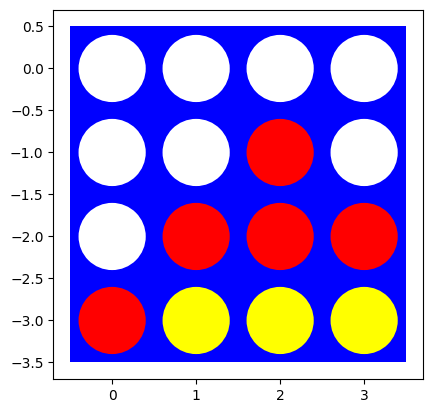

Best move :3


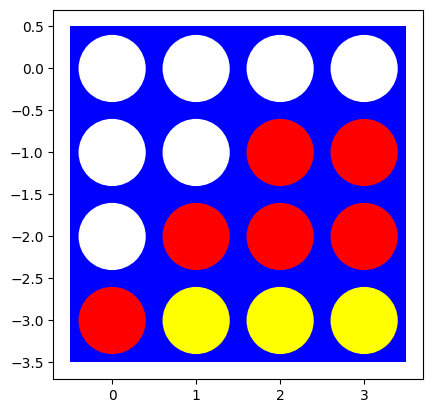



Manually created board 2:
[[ 0  0  0  0]
 [ 0  1  1  0]
 [ 0 -1 -1  0]
 [ 0 -1  1  0]]


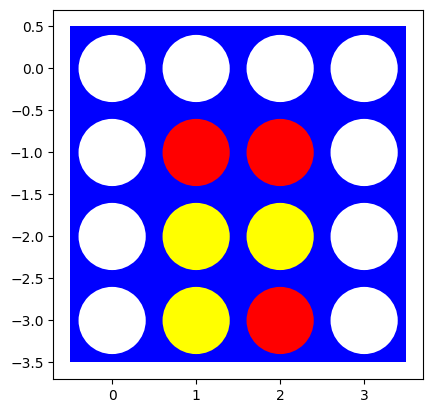

Best move :3


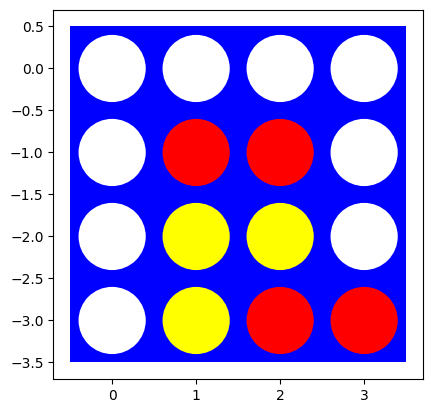



Manually created board 3:
[[ 0  0  0  0]
 [ 0  1 -1  0]
 [ 0  1 -1  0]
 [-1  1  1  0]]


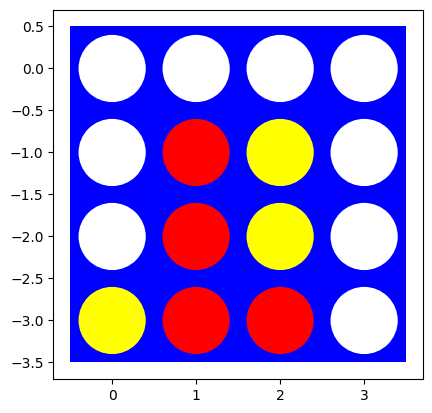

Best move :3


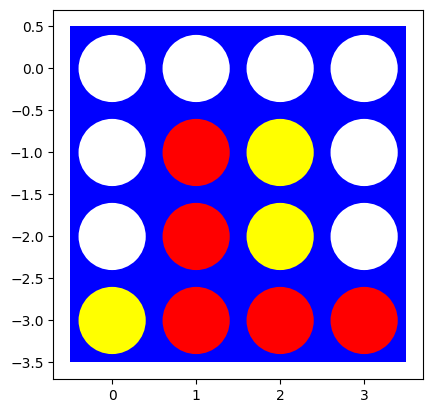



Manually created board 4:
[[ 0  0  0  0]
 [ 0  1  1  0]
 [ 0 -1 -1  0]
 [ 0  1  1  1]]


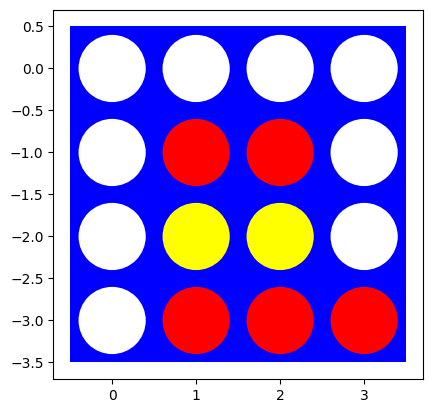

Best move :3


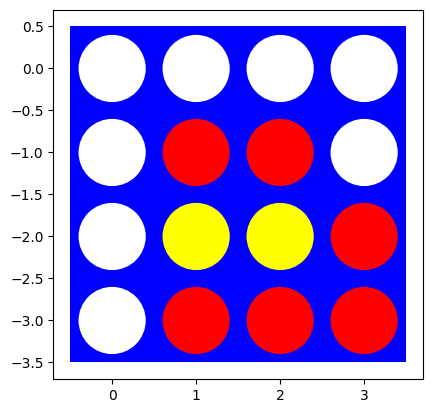



Manually created board 5:
[[ 0  0  0  0]
 [-1 -1  1  0]
 [ 1  1  1  0]
 [ 1 -1 -1 -1]]


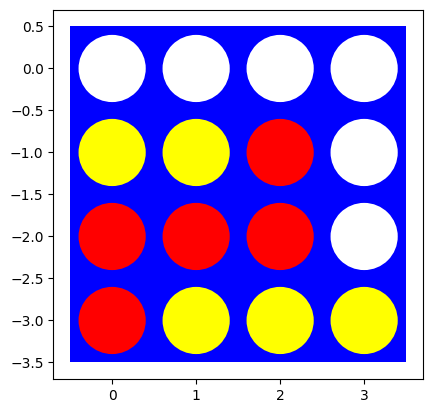

Best move :3


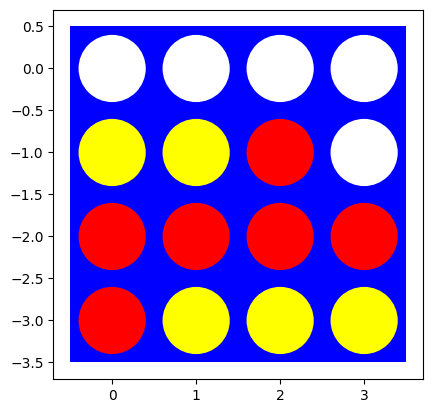

In [24]:
manual_boards = [
    np.array([
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 1, 1],
        [1, -1, -1, -1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, -1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, -1, 0],
        [0, 1, -1, 0],
        [-1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 1]
    ]),
        np.array([
        [0, 0, 0, 0],
        [-1, -1, 1, 0],
        [1, 1, 1, 0],
        [1, -1, -1, -1]
    ])
]

game = Connect4MiniMaxPruningAgentHeuristicCutoff(
    player=1, actions=actions, result=result,
    terminal=terminal, utility=utility, check_diagonal = check_diagonal, check_horizontal= check_horizontal, check_vertical= check_vertical
)

for i, board in enumerate(manual_boards):
    print(f"\nManually created board {i + 1}:")
    print(board)
    visualize(board)
    best_move, _ = game.minimax_alpha_beta(board, depth=10, cut_off = 7, n=4)
    if best_move is not None:
        print(f"Best move :{best_move}")
        # Visualize the final board after the agent's move
        final_board = game.result(board, player=1, action=best_move)
        visualize(final_board)
    else:
        print("No valid move found for player 1")
    print("")


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

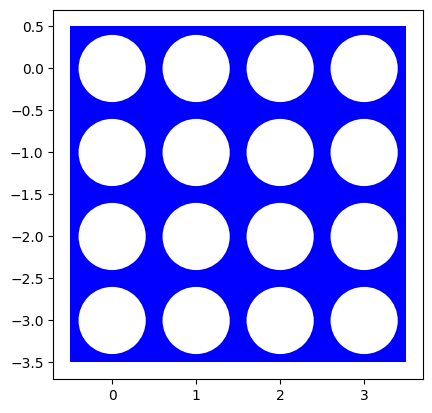

Best move for player 1 is column 3


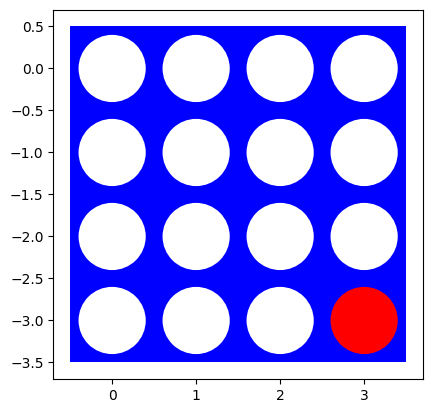

Time taken to make a move: 0.45633888244628906 seconds
------------------------------------------


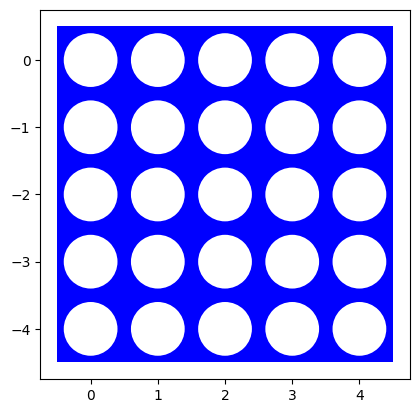

Best move for player 1 is column 4


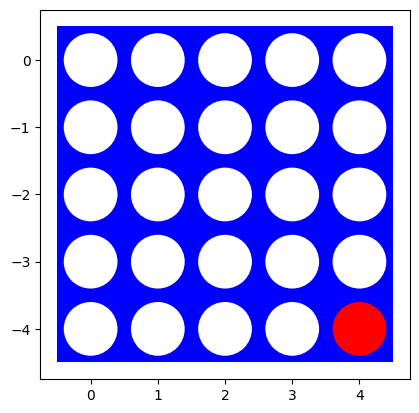

Time taken to make a move: 0.5137143135070801 seconds
------------------------------------------


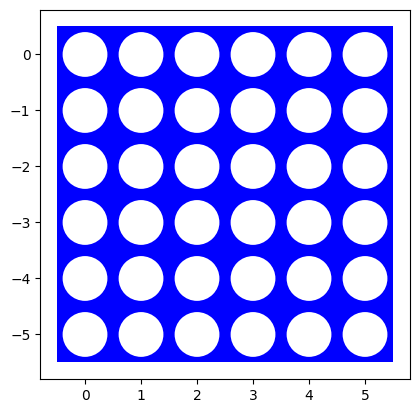

Best move for player 1 is column 5


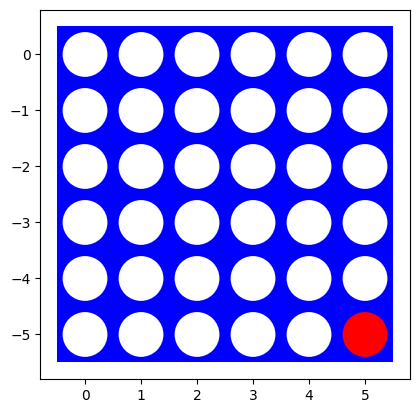

Time taken to make a move: 0.6615045070648193 seconds
------------------------------------------


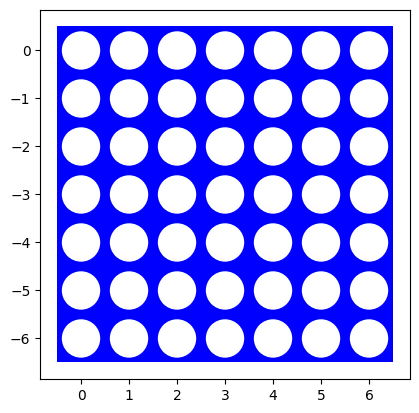

Best move for player 1 is column 6


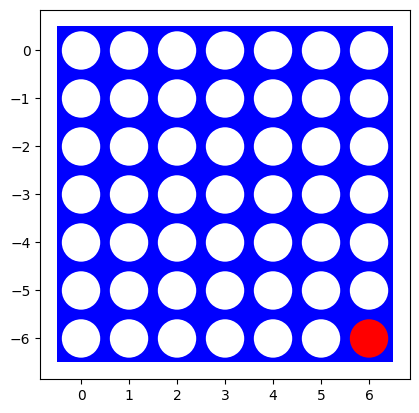

Time taken to make a move: 0.7139968872070312 seconds
------------------------------------------


In [25]:
import time

# Your code/ answer goes here.
agent_heuristic = Connect4MiniMaxPruningAgentHeuristicCutoff(
    player=1,
    actions=actions,
    result=result,
    terminal=terminal,
    utility=utility,
    check_diagonal=check_diagonal,
    check_horizontal=check_horizontal,
    check_vertical=check_vertical
)

board_sizes = [(4, 4), (5, 5), (6, 6), (7, 7)]

# Measure time for making a move on each board size
for size in board_sizes:
    rows, cols = size
    start_time = time.time()
    board = np.zeros((rows, cols))
    visualize(board)
    best_move, _ = agent_heuristic.minimax_alpha_beta(board, depth=10, cut_off = 7, n=4)
    if best_move is not None:
        print(f"Best move for player 1 is column {best_move}")
        # Visualize the final board after the agent's move
        final_board = game.result(board, player=1, action=best_move)
        visualize(final_board)
    end_time = time.time()
    print(f"Time taken to make a move: {end_time - start_time} seconds")
    print("------------------------------------------")

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

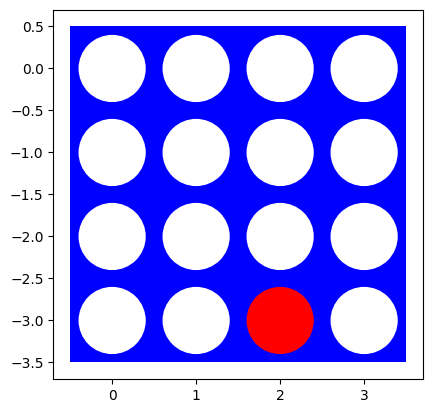

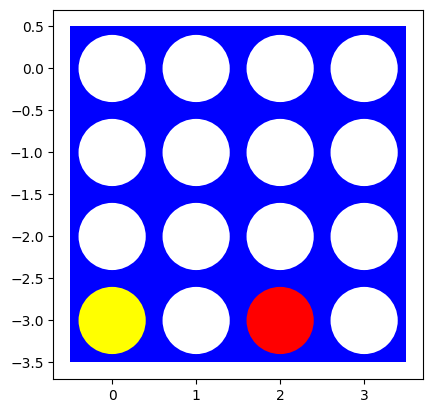

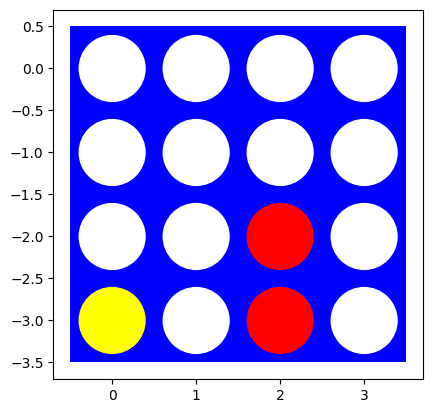

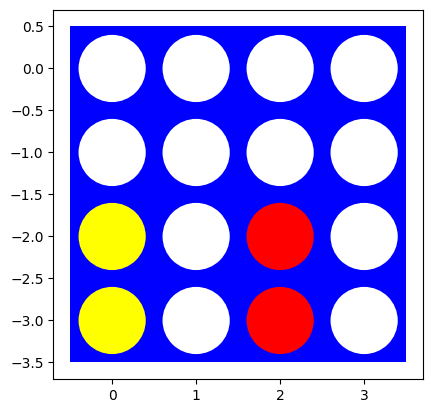

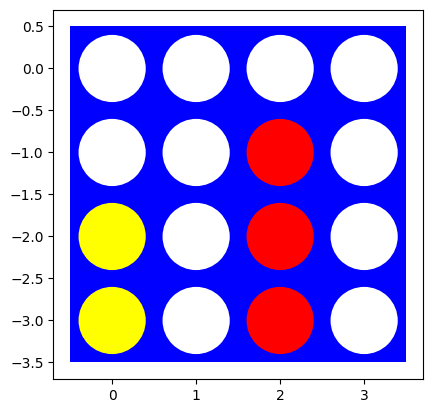

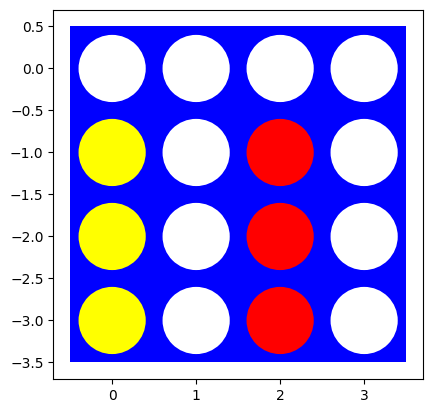

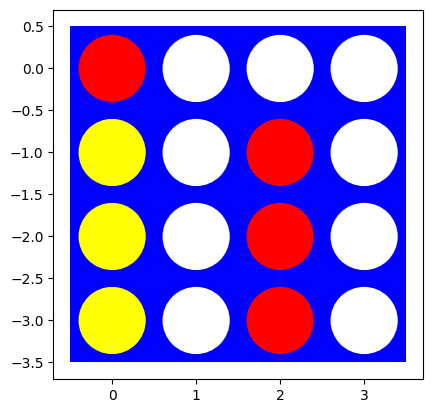

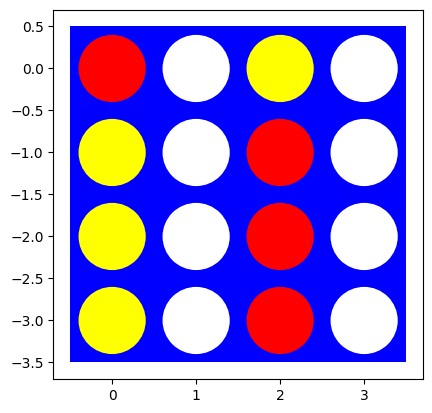

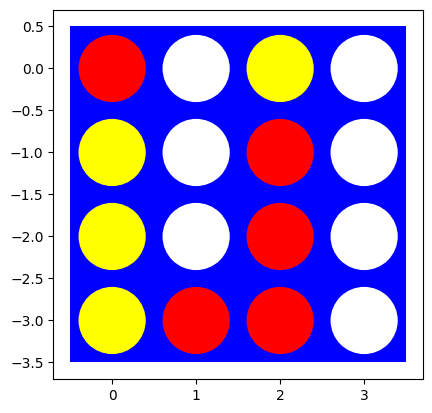

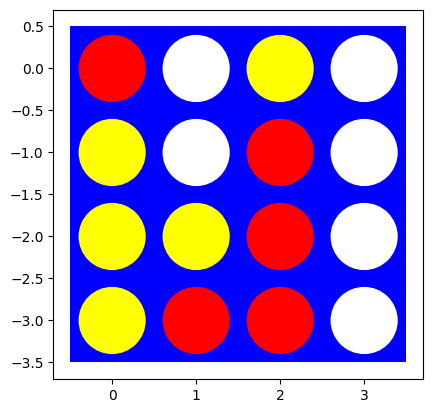

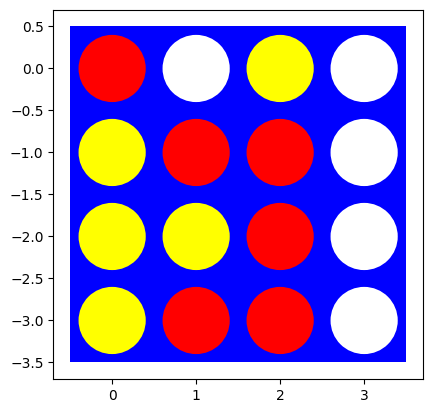

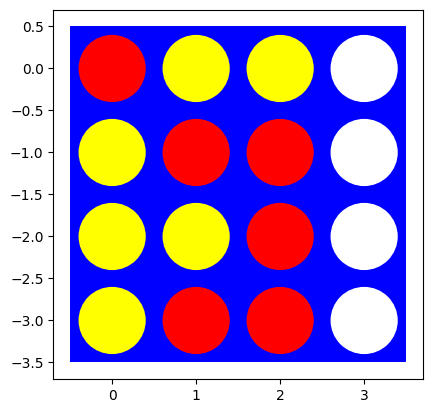

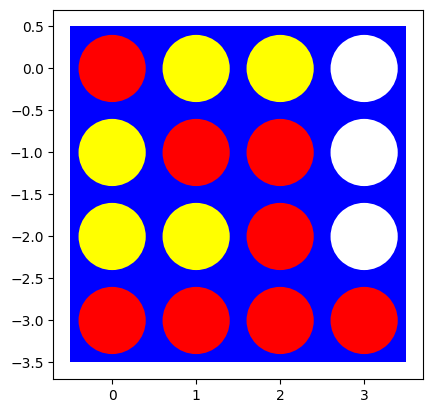

Player 1 wins!


In [30]:
# Your code/ answer goes here.
player1_Heu = Connect4MiniMaxPruningAgentHeuristicCutoff(
    player=1,
    actions=actions,
    result=result,
    terminal=terminal,
    utility=utility,
    check_diagonal=check_diagonal,
    check_horizontal=check_horizontal,
    check_vertical=check_vertical
)

player2_Heu = Connect4MiniMaxPruningAgentHeuristicCutoff(
    player=-1,
    actions=actions,
    result=result,
    terminal=terminal,
    utility=utility,
    check_diagonal=check_diagonal,
    check_horizontal=check_horizontal,
    check_vertical=check_vertical
)


board = np.zeros((4, 4), dtype=int)

# Main game loop
current_player = 1
while not terminal(board, 4):
    if current_player == 1:
        move, _ = player1_Heu.minimax_alpha_beta(board, depth=7, cut_off = 1, n=4)
    else:
        move, _ = player2_Heu.minimax_alpha_beta(board, depth=7, cut_off = 3, n=4)

    board = result(board, current_player, move)
    visualize(board)
    current_player = -1 if current_player == 1 else 1

winner = utility(board, 1, 4) if utility(board, 1, 4) != 0 else utility(board, -1, 4)
# print(board)
# print(winner)
if winner == 1:
    print("Player 1 wins!")
elif winner == -1:
    print("Player 2 wins!")
else:
    print("It's a draw!")



## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

Board:


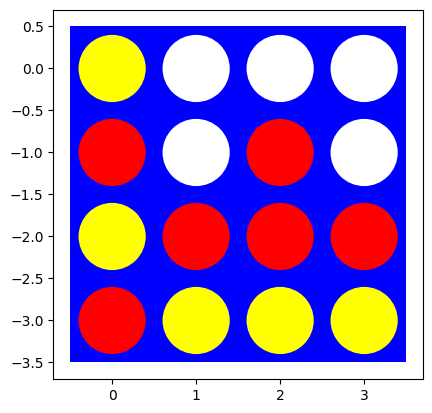

Best action: 3


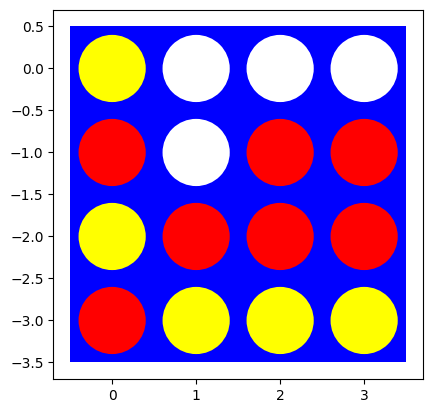

------------------------------
Board:


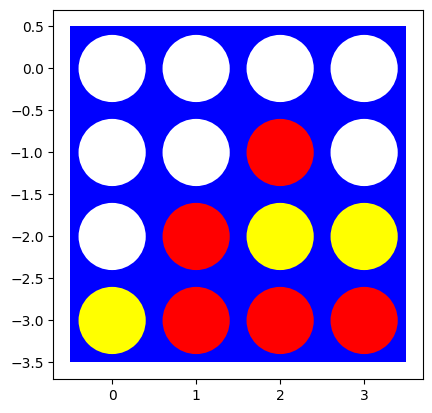

Best action: 1


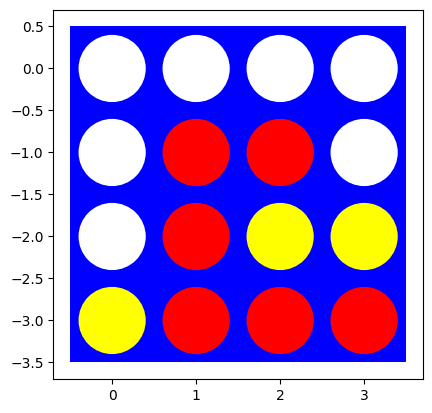

------------------------------
Board:


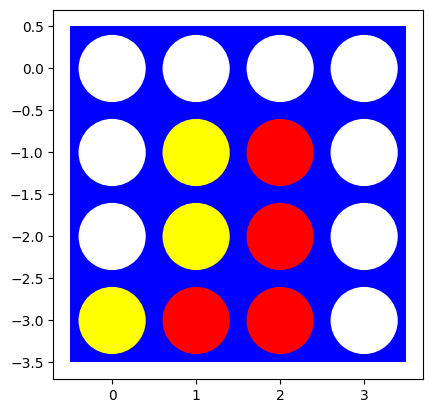

Best action: 2


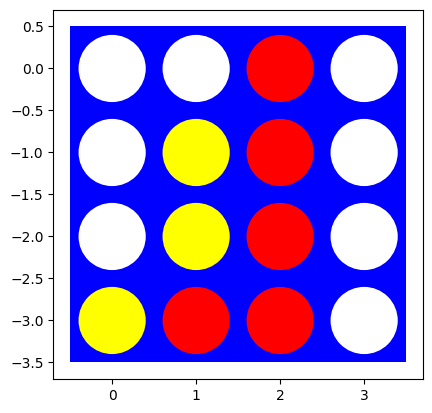

------------------------------
Board:


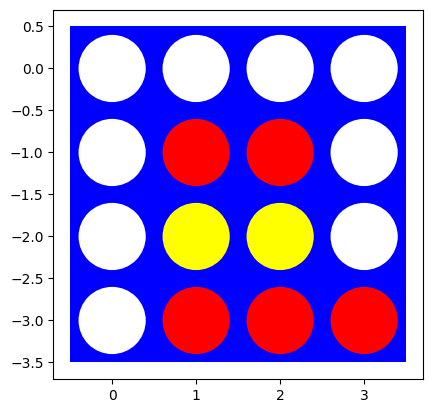

Best action: 0


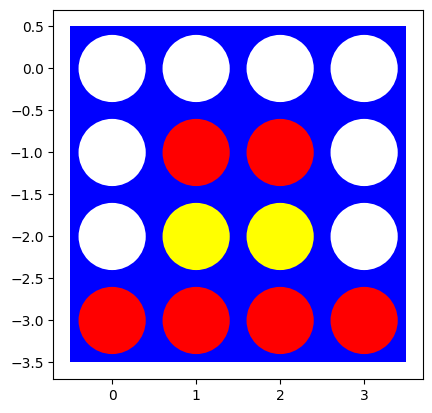

------------------------------
Board:


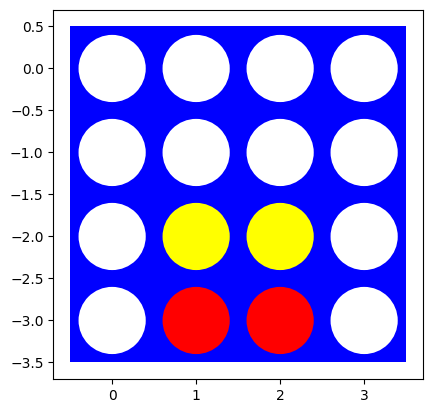

Best action: 3


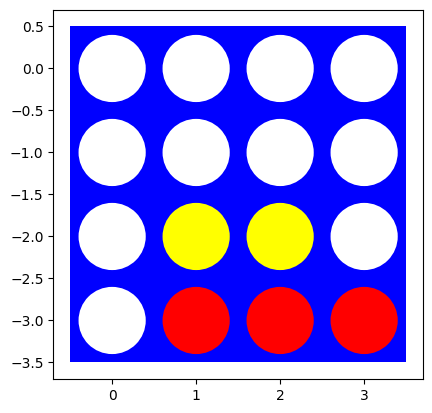

------------------------------


In [31]:
import numpy as np
def pure_monte_carlo_search(board, player, n, runs=100):
    action_list = actions(board)
    if not action_list:
        return None  # No valid actions
    action_scores = {action: 0 for action in action_list}
    for _ in range(runs):
        for action in action_list:
            simulated_board = result(board, player, action)
            score = play_game(simulated_board, player, n)
            action_scores[action] += score
    best_action = max(action_scores, key=action_scores.get)
    return best_action

def play_game(board, player, n):
    original_player = player
    while not terminal(board, n):
        valid_actions = actions(board)
        if not valid_actions:
            break
        action = np.random.choice(valid_actions)
        board = result(board, player, action)
        player *= -1
    return utility(board, original_player, n) or 0



manual_boards = [
    np.array([
        [-1, 0, 0, 0],
        [1, 0, 1, 0],
        [-1, 1, 1, 1],
        [1, -1, -1, -1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, -1, -1],
        [-1, 1, 1, 1]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, -1, 1, 0],
        [0, -1, 1, 0],
        [-1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 1]
    ]),
        np.array([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, -1, -1, 0],
        [0, 1, 1, 0]
    ])
]

n = 4
runs = 1000
for board in manual_boards:
    print("Board:")
    visualize(board)
    best_action = pure_monte_carlo_search(board.copy(), 1, n, runs)
    print("Best action:", best_action)
    final_board = result(board,1,best_action)
    visualize(final_board)
    print("-" * 30)

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

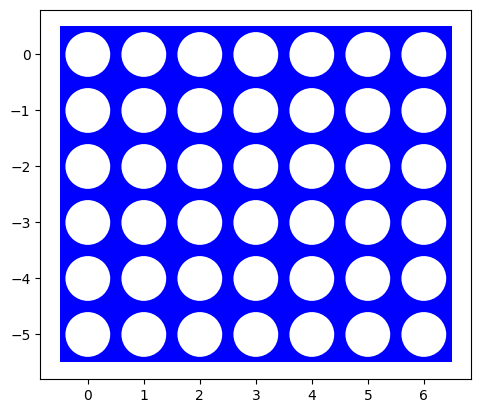

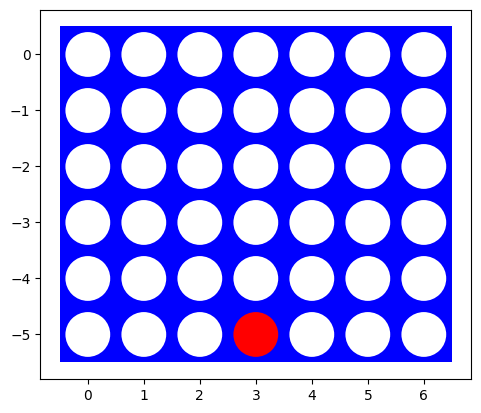

In [137]:
board = np.zeros((6, 7))
visualize(board)
best_action = pure_monte_carlo_search(board.copy(), 1, n, runs=1000)
final_board = result(board,1,best_action)
visualize(final_board)


For determining the best move for a 6x7 board, the pure monte carlo search would traverse through all the possible actions in the runs. Then, based on the results it would process and decide what could be the best move of action. It play and processes random games to determine the best moves in advance

In [32]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [34]:
from google.colab import drive

!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/FinalConnect4.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FinalConnect4.ipynb to html
[NbConvertApp] Writing 4849360 bytes to /content/drive/MyDrive/Colab Notebooks/FinalConnect4.html
